**Home Credit Default Risk Recognition**

-by Fityan Setyawan

**Background**

Dengan berkembangnya teknologi di bidang finansial saat ini, berbagai akses bantuan keuangan sangat memudahkan bagi masyarakat. Meningkatnya pengguna untuk produk keuangan seperti pinjaman, kredit, deposito sangat mendukung proses operasi dari penyedia jasa keuangan. Disisi lain hal tersebut menjadi tantangan besar bagi penyedia jasa keuangan untuk mampu memberikan produk-produk keuangan secara objektif sehingga manfaat bisa didapatkan oleh kedua belah pihak. Seringkali untuk mempertimbangkan kelayakan dari calon peminjam, penyedia jasa melihat dari track record kredit dari calon peminjam tersebut. Akan tetapi data yang diperolleh dari calon peminjam belum tentu dengan tepat merepresentasikan tentang keberhasilan atau kegagalan pembayaran peminjaman nantinya.

Pada projek ini berusaha untuk dapat memprediksi resiko gagal bayar dari peminjaman melalui pembelajaran mesin (machine learning). Proses pembelajaran mesin ini akan dilakukan proses klasifikasi pada calon peminjam untuk mengetahui resiko gagal bayar mereka. Hasil nantinya akan memberikan rekomendasi dan juga pandangan bisnis terkait hasil pengolahan data menggunakan pembelajaran mesin ini. Projek ini tentunya menjadi bagian dari proses belajar saya dalam bidang ini, tentunya masih sangat banyak kekurangan dan juga tahapan yang masih dapat diperbaiki lagi. Terimakasih ...

**Problem**

Saat ini perusahaan memiliki tingkat gagal bayar peminjam mencapai 8.1%, di sektor keuangan angka tersebut tergolong besar dengan jumlah kerugian yang memiliki dampak besar pada perusahaan

**Goals**

Mengurangi tingkat gagal bayar peminjam pada perusahaan, melalui rekomendasi bisnis yang aplikatif.

**Objective**



1.   Membuat program machine learning yang mampu mengklasifikasikan peminjam dengan resiko gagal bayar
2.   Memberikan rekomendasi dan insight business.



**1. Data Acesss**


1.   Install package and library
2.   Data Acesss




**1.1 Install package and library**

In [ ]:
!pip install shapely
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 4.1 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 25.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from datetime import date
from datetime import datetime as dt
import matplotlib.pyplot as plt
import matplotlib_inline
from matplotlib.patches import Patch
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc, roc_auc_score
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_validate
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
import shap
from xgboost import XGBRegressor
#from sklearn.datasets import load_boston
from sklearn.inspection import permutation_importance
from sklearn.inspection import PartialDependenceDisplay


**1.2 Data Acess**

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

dfapp_train = pd.read_csv("/content/drive/MyDrive/project_final_dataset/application_train.csv")
dfapp_test = pd.read_csv("/content/drive/MyDrive/project_final_dataset/application_test.csv")
dfbureau = pd.read_csv("/content/drive/MyDrive/project_final_dataset/bureau.csv")
dfbureau_balance = pd.read_csv("/content/drive/MyDrive/project_final_dataset/bureau_balance.csv")
dfcredit_card_balance = pd.read_csv("/content/drive/MyDrive/project_final_dataset/credit_card_balance.csv")
dfinstallments_payments = pd.read_csv("/content/drive/MyDrive/project_final_dataset/installments_payments.csv")
dfpos_cash_balance = pd.read_csv("/content/drive/MyDrive/project_final_dataset/POS_CASH_balance.csv")
dfprevious_application = pd.read_csv("/content/drive/MyDrive/project_final_dataset/previous_application.csv")

dfapp_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


**2. Data Exploration And Preparation**

1.   Data Exploration
2.   Data Visualization
3.   Data Preparation

**2.1 Data Exploration**

In [ ]:
# Checck missing values
#dfapp_train.info(verbose= True, show_counts= True)

print("Kolom yang memiliki missing values lebih dari 20% ")
column_missing = dfapp_train.isna().mean()
print(column_missing[column_missing > 0.2].index)
print("Sebanyak",len(column_missing[column_missing > 0.2].index), "Kolom")

Kolom yang memiliki missing values lebih dari 20% 
Index(['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
       'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAR

Dari data feature diatas terdapat 50 feature dengan jumlah missing value lebih dari 20%. Beberapa fitur dataset tersebut akan dieksplorasi kembali, untuk feature dengan jumlah missing values tinggi akan di drop di tahap berikutnya.

In [ ]:
# dataset understanding dilakukan pada salah satu table sebagai contoh
print("Application train memiliki", len(dfapp_train.columns),"feature sebagai berikut")
for i in dfapp_train.columns:
  print(i)
print("Dengan jumlah record sebanyak", len(dfapp_train.index))

print(10*"===")
print("Berikut info tabel dan record")
df_info1 = {'Table': ['application train', 'application test', 'bureau', 'bureau balance', 'creadit card balance', 'installments payments', 'pos cash balance', 'previous application'],
        'Feature': [len(dfapp_train.columns),len(dfapp_test.columns) ,len(dfbureau.columns),len(dfbureau_balance.columns),len(dfcredit_card_balance.columns),
        len(dfinstallments_payments.columns),len(dfpos_cash_balance.columns), len(dfprevious_application.columns) ],
        'Record': [len(dfapp_train.index),len(dfapp_test.index) ,len(dfbureau.index),len(dfbureau_balance.index),len(dfcredit_card_balance.index),
        len(dfinstallments_payments.index),len(dfpos_cash_balance.index), len(dfprevious_application.index)]}
df_info = pd.DataFrame(df_info1)
print(df_info)

Application train memiliki 122 feature sebagai berikut
SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGA

**2.1 Data Exploration**

Informasi untuk data missing setiap kolom (feature)

(0.0, 100.0)

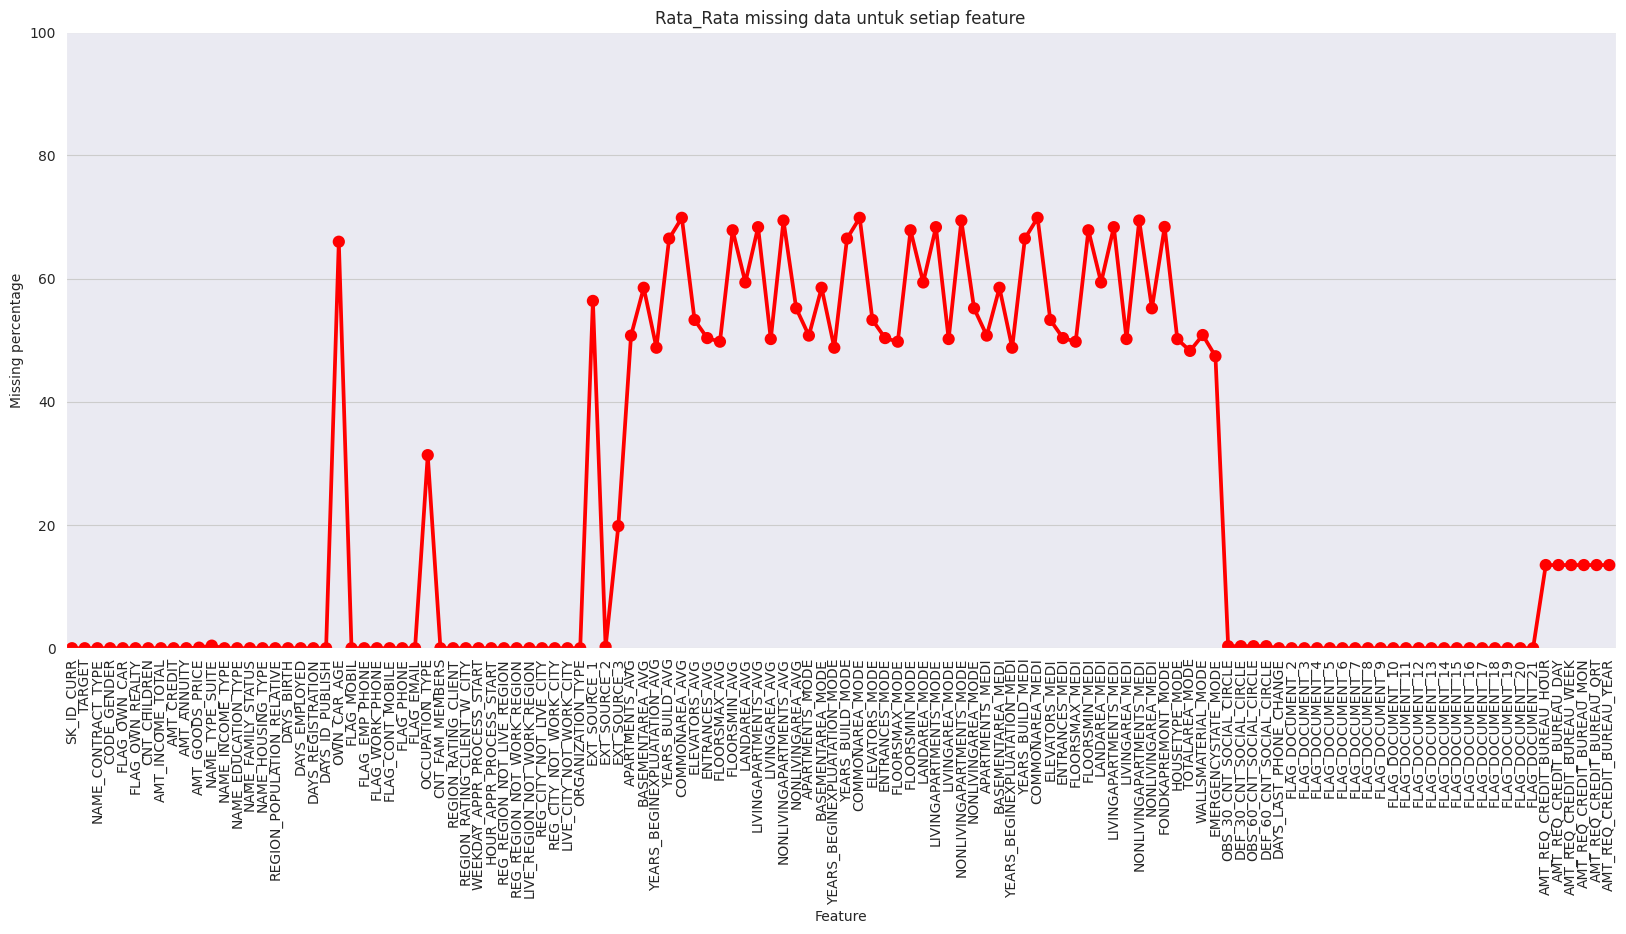

In [ ]:
#Visualisasi missing data dari Tabel Application_train
fig = plt.figure(figsize=(20,8))
data_missing = pd.DataFrame(column_missing*100).reset_index()
sns.set_style('darkgrid', {"grid.color": ".8"})
ax = sns.pointplot(x="index",y=0,data=data_missing, color='red')
plt.xticks(rotation =90)
plt.title("Rata_Rata missing data untuk setiap feature")
plt.ylabel("Missing percentage")
plt.xlabel("Feature")
plt.ylim((0,100))

Dari visualisasi diatas dapat diketahui bahwa missing percentage tertinggi ada pada beberapa feature seperti Common Area average, Elevators mode dan beberapa kolom lain dengan presentase missing value yang tinggi

(0.0, 100.0)

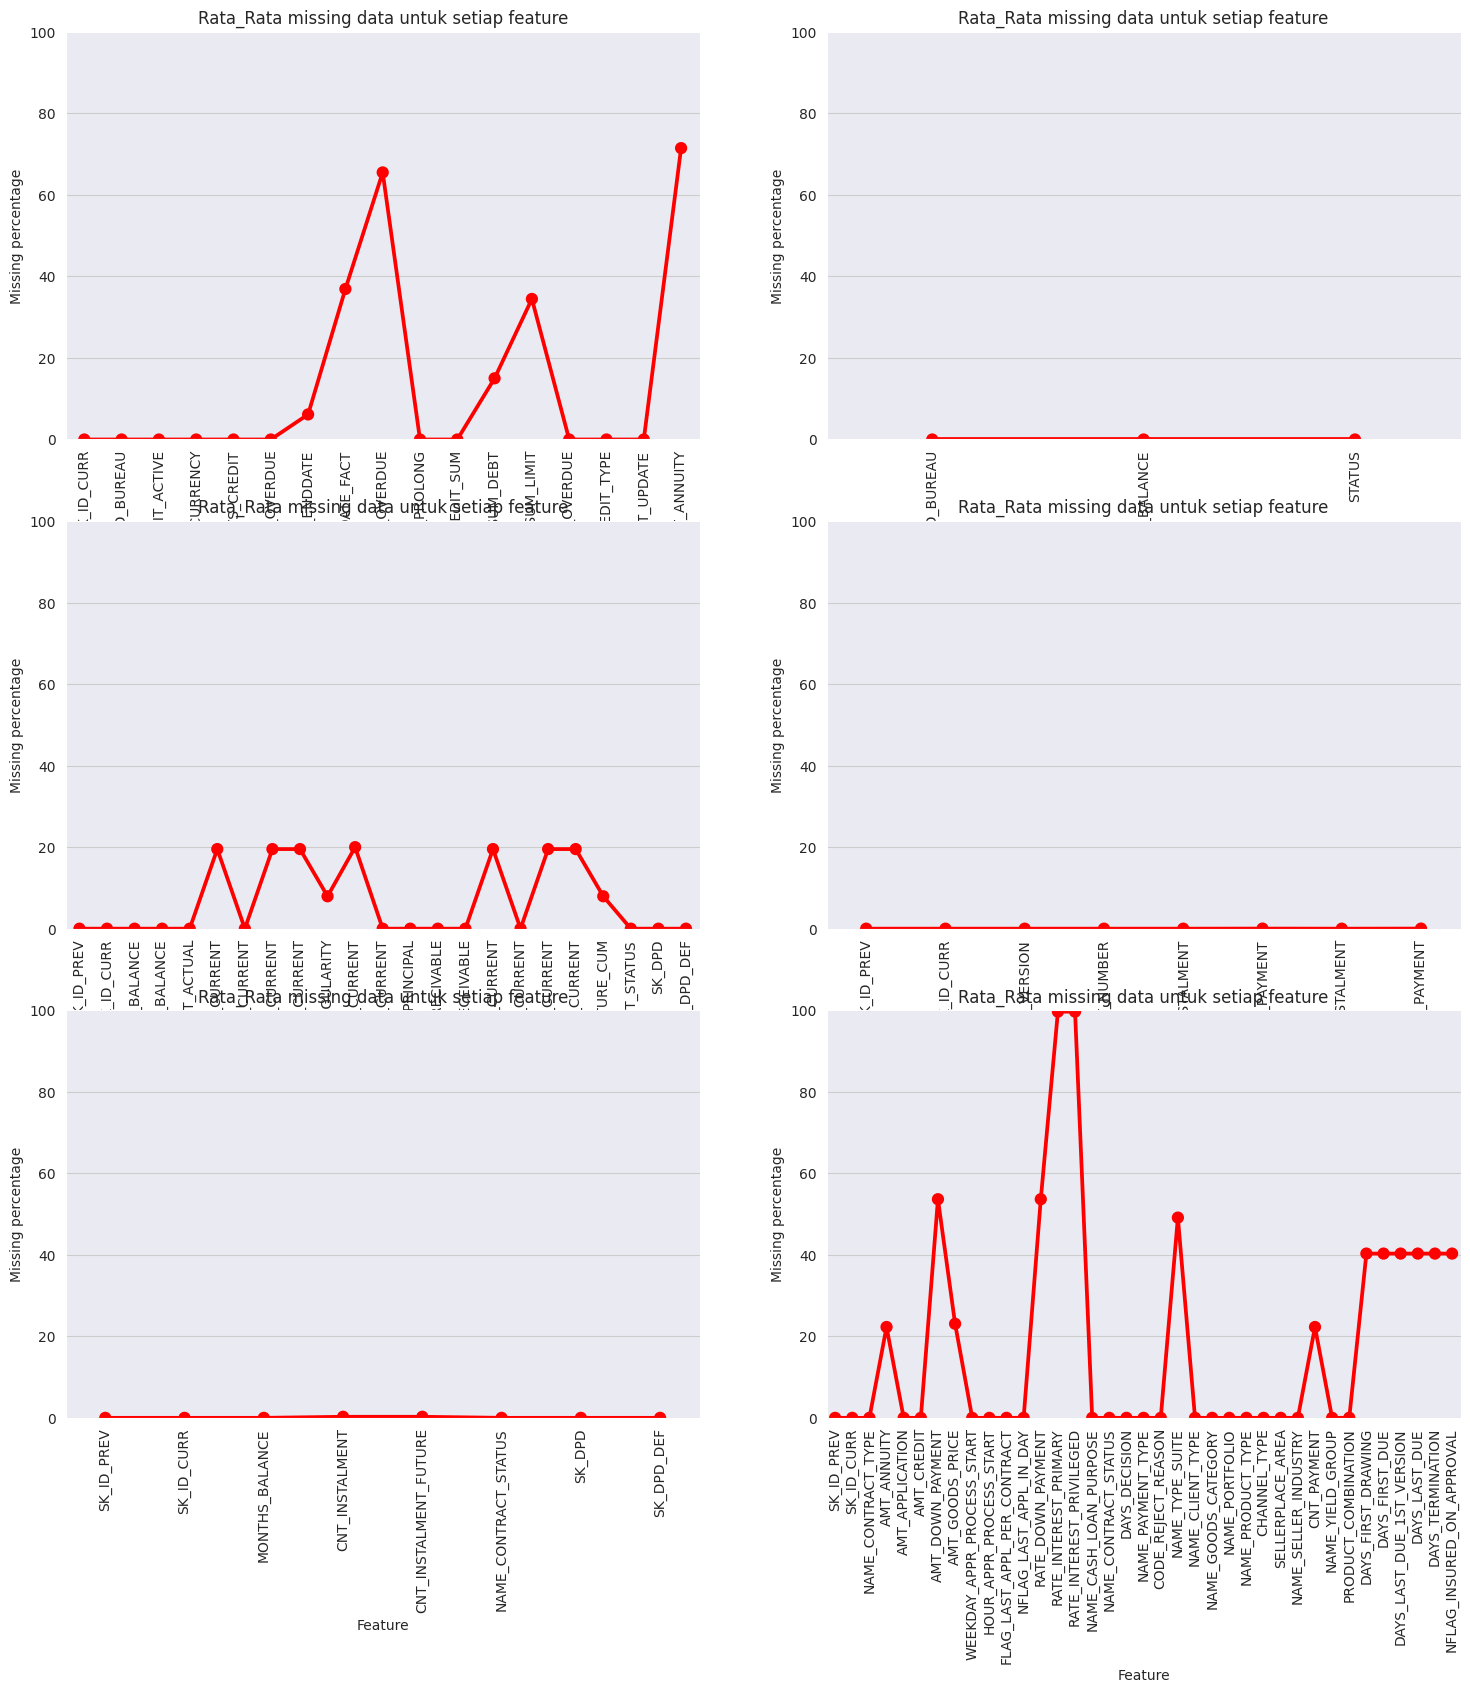

In [ ]:
#visualisasi missing data untuk tabel lain

fig = plt.figure(figsize=(18,18))

plt.subplot(3,2,1)
sns.set_style('darkgrid', {"grid.color": ".8"})
ax = sns.pointplot(x="index",y=0,data= (dfbureau.isna().mean()*100).reset_index(), color='red')
plt.xticks(rotation =90)
plt.title("Bureau")
plt.ylabel("Missing percentage")
plt.xlabel("Feature")
plt.ylim((0,100))

plt.subplot(3,2,2)
sns.set_style('darkgrid', {"grid.color": ".8"})
ax = sns.pointplot(x="index",y=0,data= (dfbureau_balance.isna().mean()*100).reset_index(), color='red')
plt.xticks(rotation =90)
plt.title("Bureau Balance")
plt.ylabel("Missing percentage")
plt.xlabel("Feature")
plt.ylim((0,100))

plt.subplot(3,2,3)
sns.set_style('darkgrid', {"grid.color": ".8"})
ax = sns.pointplot(x="index",y=0,data= (dfcredit_card_balance.isna().mean()*100).reset_index(), color='red')
plt.xticks(rotation =90)
plt.title("Credit Card Balance")
plt.ylabel("Missing percentage")
plt.xlabel("Feature")
plt.ylim((0,100))

plt.subplot(3,2,4)
sns.set_style('darkgrid', {"grid.color": ".8"})
ax = sns.pointplot(x="index",y=0,data= (dfinstallments_payments.isna().mean()*100).reset_index(), color='red')
plt.xticks(rotation =90)
plt.title("Installments Payments")
plt.ylabel("Missing percentage")
plt.xlabel("Feature")
plt.ylim((0,100))

plt.subplot(3,2,5)
sns.set_style('darkgrid', {"grid.color": ".8"})
ax = sns.pointplot(x="index",y=0,data= (dfpos_cash_balance.isna().mean()*100).reset_index(), color='red')
plt.xticks(rotation =90)
plt.title("Pos Cash Balance")
plt.ylabel("Missing percentage")
plt.xlabel("Feature")
plt.ylim((0,100))

plt.subplot(3,2,6)
sns.set_style('darkgrid', {"grid.color": ".8"})
ax = sns.pointplot(x="index",y=0,data= (dfprevious_application.isna().mean()*100).reset_index(), color='red')
plt.xticks(rotation =90)
plt.title("Previous Application")
plt.ylabel("Missing percentage")
plt.xlabel("Feature")
plt.ylim((0,100))

Setelah akses data pada tiap table, terdapat table dengan tingkat missing value yang tinggi untuk setiap kolomnya, seperti data bureau dan previous application

Check Imbalance Data


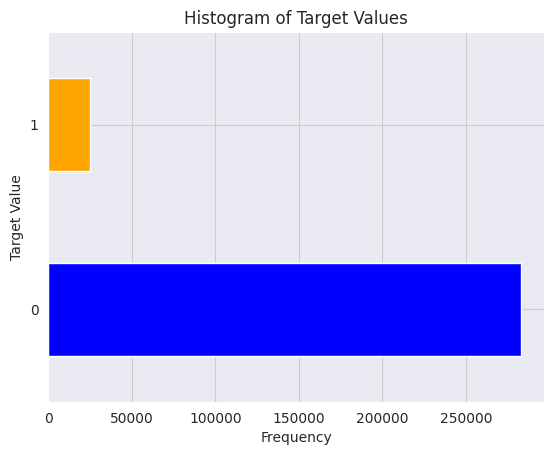

In [ ]:
dfapp_train["TARGET"].value_counts().plot.barh(color = ['blue', 'orange'])
plt.xlabel('Frequency')
plt.ylabel('Target Value')
plt.title('Histogram of Target Values')
plt.show()

Histogram diatas menujukkan bahwa target dengan value 0 jauh lebih banyak dibandingkan dengan value 1 (atau yang beresiko gagal)

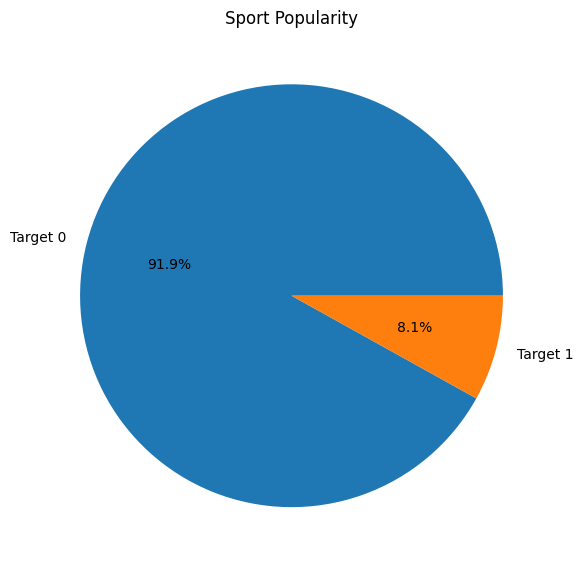

In [ ]:
labels = ["Target 0", "Target 1"]
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(dfapp_train["TARGET"].value_counts(), labels=labels, autopct='%.1f%%')
ax.set_title('Percentage Target')
plt.tight_layout()

presentase value target bernilai 1 adalah 8.1%, angka tersebut masih tergolong besar dimana 8,1% dari peminjam gagal membayar pinjaman mereka

correlation and distribution

Text(0, 0.5, 'NAME_CONTRACT_TYPE')

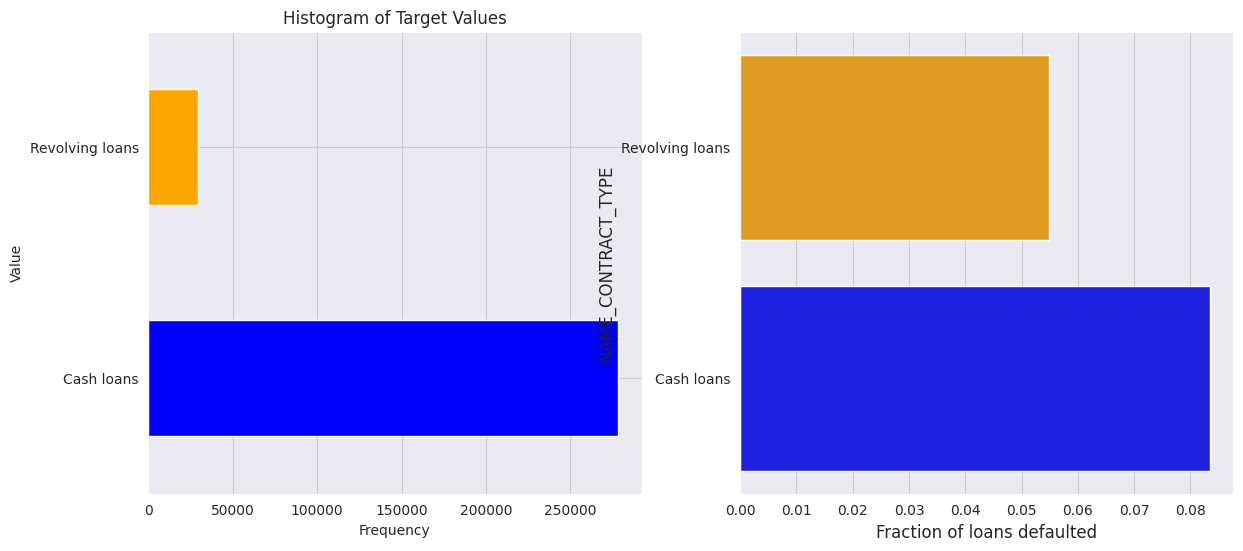

In [ ]:
fig = plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
dfapp_train["NAME_CONTRACT_TYPE"].value_counts().plot.barh(color = ['blue', 'orange'])
plt.xlabel('Frequency')
plt.ylabel('Value')
plt.title('Histogram of Target Values')


plt.subplot(1,2,2)
PERCENTAGE = dfapp_train[["NAME_CONTRACT_TYPE", 'TARGET']].groupby(["NAME_CONTRACT_TYPE"],as_index=False).mean()
PERCENTAGE.sort_values(by='TARGET', ascending=True, inplace=True)
sns.barplot(y = 'NAME_CONTRACT_TYPE', x='TARGET', data=PERCENTAGE, palette = ['orange', 'blue'])
plt.xlabel('Fraction of loans defaulted', fontsize=12)
plt.ylabel("NAME_CONTRACT_TYPE", fontsize=12)


Presentase kegagalan dari jenis peminjaman tersebut menunjukkan bahwa peminjaman secara cash lebih beresiko mengalami gagal bayar dari peminjam

Text(0, 0.5, 'NAME INCOME TYPE')

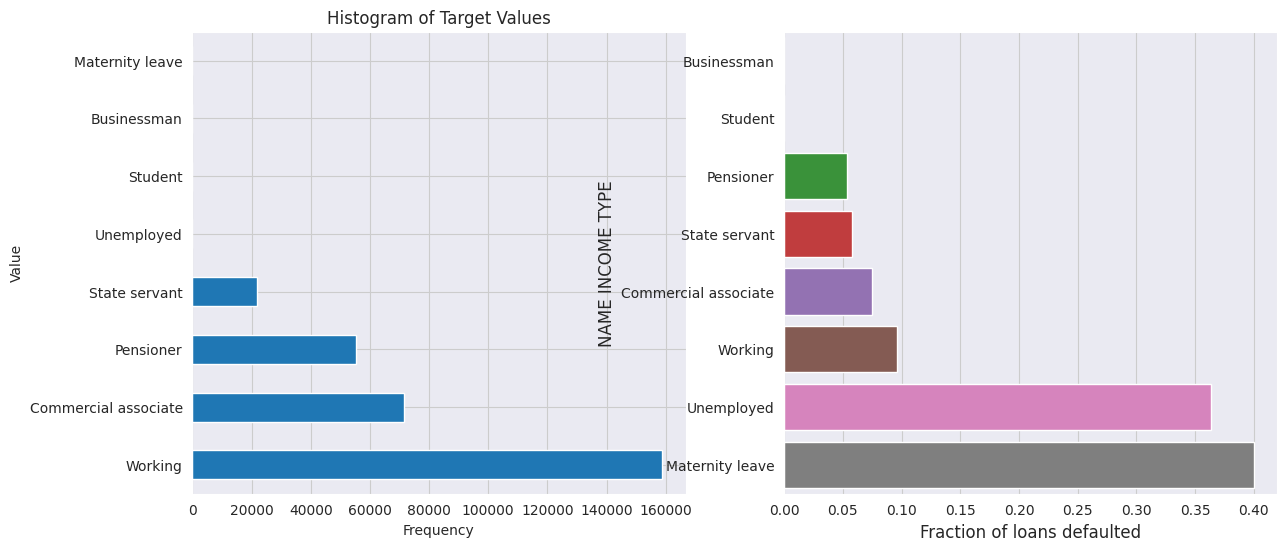

In [ ]:
plt.figure(figsize=(14,6))
fig.subplots_adjust(wspace=0.7)

plt.subplot(121)
dfapp_train["NAME_INCOME_TYPE"].value_counts().plot.barh()
plt.xlabel('Frequency')
plt.ylabel('Value')
plt.title('Histogram of Target Values')
fig.tight_layout()

plt.subplot(122)
PERCENTAGE = dfapp_train[["NAME_INCOME_TYPE", 'TARGET']].groupby(["NAME_INCOME_TYPE"],as_index=False).mean()
PERCENTAGE.sort_values(by='TARGET', ascending=True, inplace=True)
sns.barplot(y = 'NAME_INCOME_TYPE', x='TARGET', data=PERCENTAGE)
plt.xlabel('Fraction of loans defaulted', fontsize=12)
plt.ylabel("NAME INCOME TYPE", fontsize=12)

Sedangkan peminjaman karena cuti hamil memiliki tingkat gagal bayar tinggi dibandingkan dengan peminjam yang masih bekerja, pensiun dan pekerjaan lain.

Text(0, 0.5, 'NAME EDUCATION TYPE')

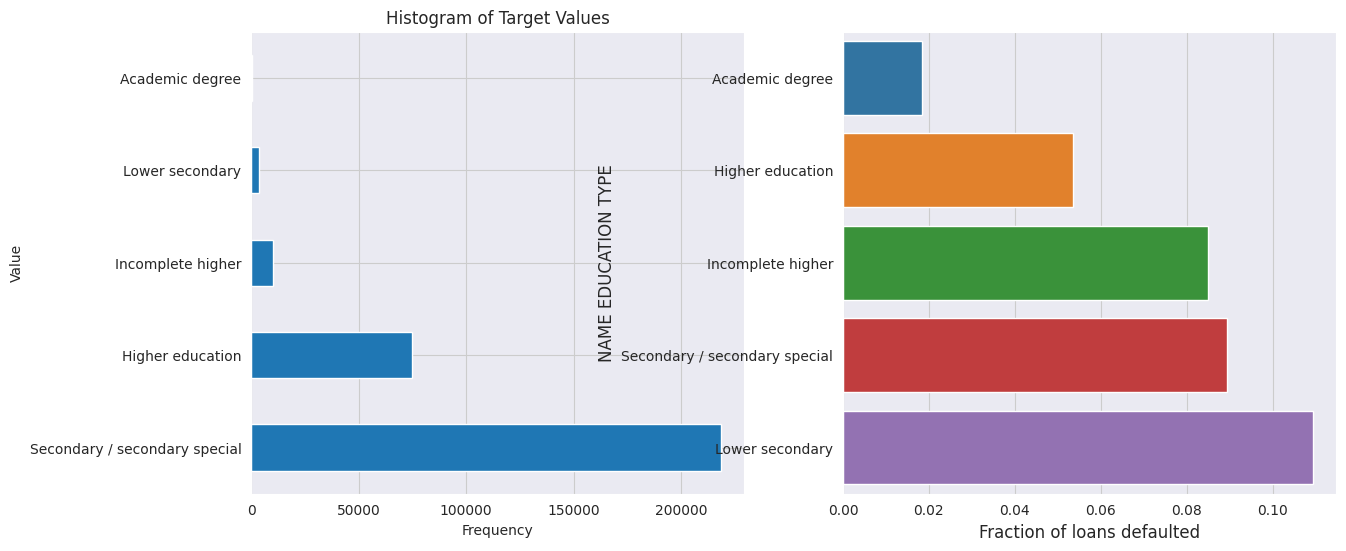

In [ ]:
plt.figure(figsize=(14,4))
fig.subplots_adjust(wspace=0.7)

plt.subplot(121)
dfapp_train["NAME_EDUCATION_TYPE"].value_counts().plot.barh()
plt.xlabel('Frequency')
plt.ylabel('Value')
plt.title('Histogram of Target Values')
fig.tight_layout()

plt.subplot(122)
PERCENTAGE = dfapp_train[["NAME_EDUCATION_TYPE", 'TARGET']].groupby(["NAME_EDUCATION_TYPE"],as_index=False).mean()
PERCENTAGE.sort_values(by='TARGET', ascending=True, inplace=True)
sns.barplot(y = 'NAME_EDUCATION_TYPE', x='TARGET', data=PERCENTAGE)
plt.xlabel('Fraction of loans defaulted', fontsize=12)
plt.ylabel("NAME EDUCATION TYPE", fontsize=12)

Tingkat pendidikan menjadi salah satu ukuran tingkat resiko gagal bayar peminjam. Semakin rendah tingkat pendidikan semakin tinggi tingkat gagal bayarnya.

Text(0, 0.5, 'NAME FAMILY STATUS')

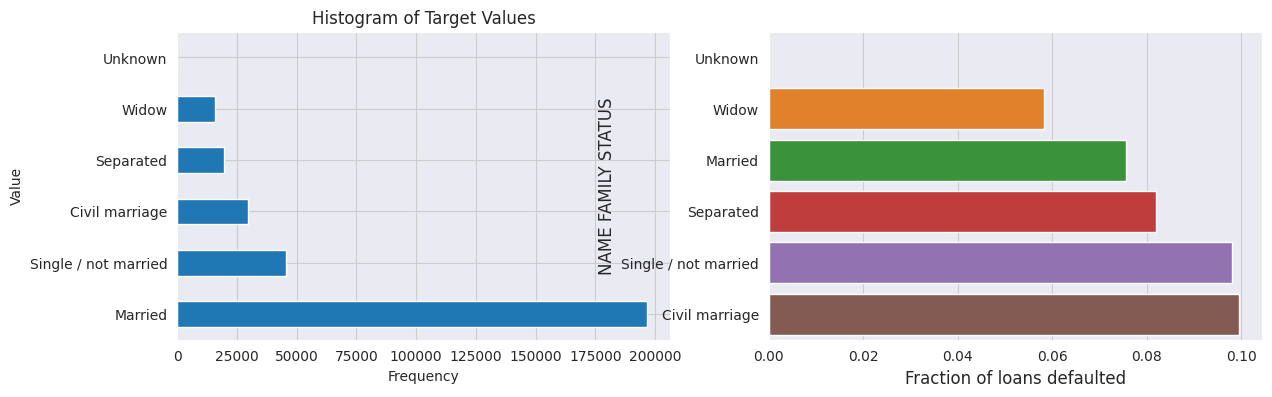

In [ ]:
plt.figure(figsize=(14,4))
fig.subplots_adjust(wspace=0.7)

plt.subplot(121)
dfapp_train["NAME_FAMILY_STATUS"].value_counts().plot.barh()
plt.xlabel('Frequency')
plt.ylabel('Value')
plt.title('Histogram of Target Values')
fig.tight_layout()

plt.subplot(122)
PERCENTAGE = dfapp_train[["NAME_FAMILY_STATUS", 'TARGET']].groupby(["NAME_FAMILY_STATUS"],as_index=False).mean()
PERCENTAGE.sort_values(by='TARGET', ascending=True, inplace=True)
sns.barplot(y = 'NAME_FAMILY_STATUS', x='TARGET', data=PERCENTAGE)
plt.xlabel('Fraction of loans defaulted', fontsize=12)
plt.ylabel("NAME FAMILY STATUS", fontsize=12)

status pernikahan juga mampu mengindikasikan gagal atau berhasil peminjam dalam membayar. Civil mariage paling banyak gagal dalam membayar pinjaman.

<function matplotlib.pyplot.show(close=None, block=None)>

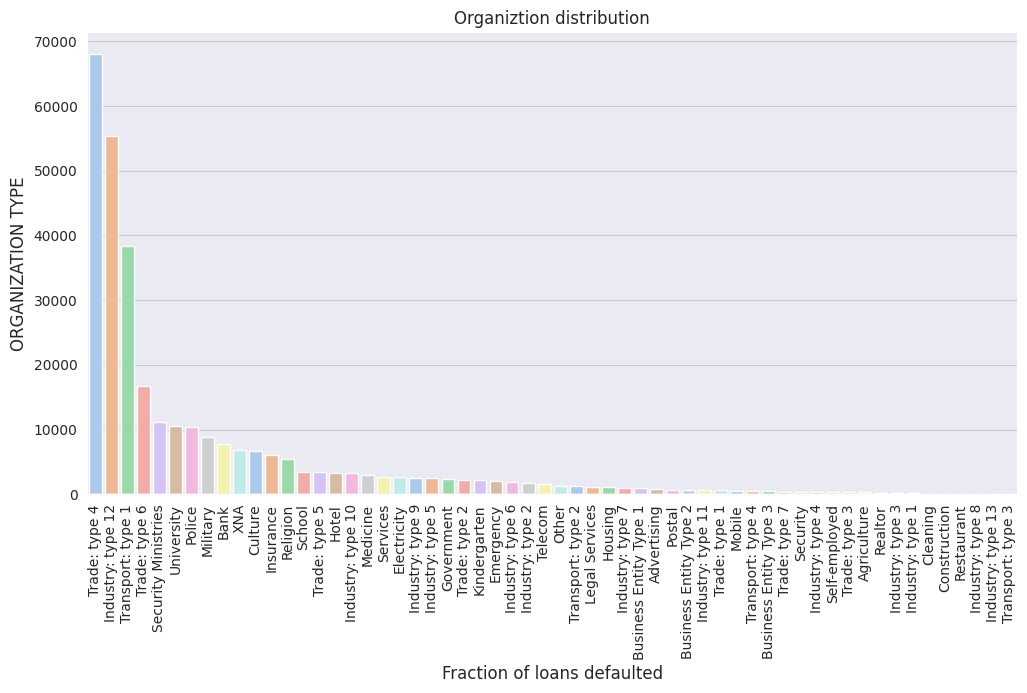

In [ ]:
plt.figure(figsize=(12,6))
fig.subplots_adjust()

org_count = dfapp_train["ORGANIZATION_TYPE"].value_counts()
org_df = pd.DataFrame({'org': org_count.index, 'Count': org_count.values})
sns.barplot(x='org', y='Count', data=org_df, palette='pastel')
plt.xlabel('Organiztion Type')
plt.ylabel('Count')
plt.title('Organiztion distribution')


Peminjam didominasi oleh orang yang bekerja sebagai pedagang dimana tipe 4 mencapai lebih dari 60.000 peminjam

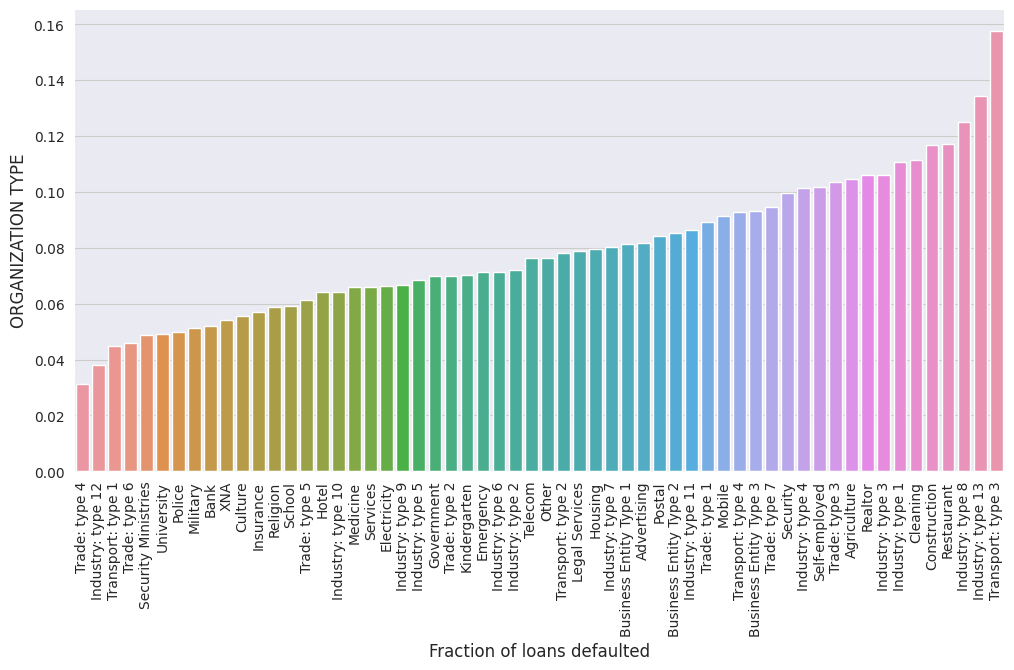

In [ ]:
plt.figure(figsize=(12,6))
PERCENTAGE = dfapp_train[["ORGANIZATION_TYPE", 'TARGET']].groupby(["ORGANIZATION_TYPE"],as_index=False).mean()
PERCENTAGE.sort_values(by='TARGET', ascending=True, inplace=True)
sns.barplot(y = 'TARGET', x='ORGANIZATION_TYPE', data=PERCENTAGE)
plt.xticks(rotation =90)
plt.xlabel('Fraction of loans defaulted', fontsize=12)
plt.ylabel("ORGANIZATION TYPE", fontsize=12)
plt.show()

Tingkat gagal bayar yang tinggi juga cenderung berasal dari peminjam yang bekerja di bidang transportasi, tipe 3.

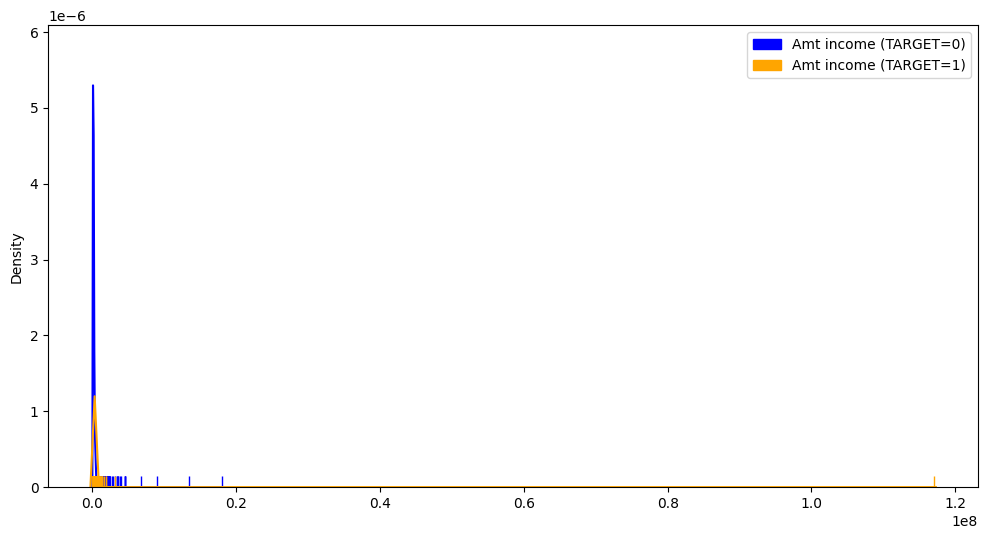

In [ ]:
#sns.distplot(dfapp_train['AMT_INCOME_TOTAL'], hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 3}, label = "INCOME TOTAL")
"""t1 = dfapp_train.loc[dfapp_train['AMT_INCOME_TOTAL'] != 0]
t0 = dfapp_train.loc[dfapp_train['TARGET'] == 0]

sns.distplot(t1[['TARGET']], hist=False, rug=True)
sns.distplot(t0[['TARGET']], hist=False, rug=True)"""
plt.figure(figsize=(12,6))
target_0 = dfapp_train.loc[dfapp_train['TARGET'] == 0]
target_1 = dfapp_train.loc[dfapp_train['TARGET'] == 1]

sns.distplot(target_0[['AMT_INCOME_TOTAL']], hist=False, rug=True, color="blue")
sns.distplot(target_1[['AMT_INCOME_TOTAL']], hist=False, rug=True, color="orange")

legend_labels = [Patch(color='blue', label='Amt income (TARGET=0)'), Patch(color='orange', label='Amt income (TARGET=1)')]
plt.legend(handles=legend_labels, loc="best")
plt.show()

Perbandingan diatas menunjukkan hubungan 2 variabel contionus untuk jumlah income dan target, dari data tersebut juga dapat diketahui terdapat outlier yang menunjukkan income yang sangat tinggi

Korelasi

In [ ]:
corr = dfapp_train[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',"TARGET"]]
#corr = dfapp_train[(dfapp_train["AMT_INCOME_TOTAL"].notnull()) & (dfapp_train["AMT_ANNUITY"].notnull()) & (dfapp_train["AMT_CREDIT"].notnull())]
sns.pairplot(corr,hue="TARGET",palette=["blue","orange"])

plt.show()

Plot diatas menunjukkan hubungan antara 3 variabel yaitu income total, jumlah credit, income annuitas dan juga target

Feature engineering
1. remove column with missing values more than 20% and not feasible feauture/ not relevan with the case
2. remove outlier and input nan values with mean



In [ ]:
column_missing = dfapp_train.isna().mean()
df_cut = column_missing[column_missing > 0.2].index
df_cut2 = dfapp_train.drop(columns = df_cut)
dfapptrain = df_cut2.drop(["DAYS_BIRTH", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL", "DAYS_LAST_PHONE_CHANGE", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "WEEKDAY_APPR_PROCESS_START", "HOUR_APPR_PROCESS_START", "NAME_TYPE_SUITE"], axis=1)
print("Jumlah Feature setelah di cut" , dfapptrain.shape[1] ,"Feature")
dfapptrain.info()

Jumlah Feature setelah di cut 60 Feature
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 60 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TY

tidak menggunakan custom imputer karena value pada kategorical memiliki data yang lengkap

In [ ]:
dfapptrain['AMT_ANNUITY'].fillna(int(dfapptrain['AMT_ANNUITY'].mean()), inplace=True)
dfapptrain['AMT_GOODS_PRICE'].fillna(int(dfapptrain['AMT_GOODS_PRICE'].mean()), inplace=True)
dfapptrain['CNT_FAM_MEMBERS'].fillna(int(dfapptrain['CNT_FAM_MEMBERS'].mean()), inplace=True)
dfapptrain['EXT_SOURCE_2'].fillna(float(dfapptrain['EXT_SOURCE_2'].mean()), inplace=True)
dfapptrain['EXT_SOURCE_3'].fillna(float(dfapptrain['EXT_SOURCE_3'].mean()), inplace=True)
dfapptrain['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(0, inplace=True)
dfapptrain['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(0, inplace=True)
dfapptrain['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(0, inplace=True)
dfapptrain['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0, inplace=True)
dfapptrain['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0, inplace=True)
dfapptrain['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0, inplace=True)
dfapptrain['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0, inplace=True)
dfapptrain['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0, inplace=True)
dfapptrain['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0, inplace=True)
dfapptrain['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0, inplace=True)
dfapptrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 60 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

Menentukan outlier pada data
Outlier pada Ammount Income Total [360000. 450000. 360000. ... 540000. 585000. 360000.] Sebanyak 14035 outlier
Outlier pada Ammount Credit [1663987.5 1755000.  2250000.  ... 1718473.5 1971072.  1762110. ] Sebanyak 6562 outlier
Outlier pada Ammount Annuity [86989.5 64107.  73611.  ... 66757.5 77809.5 68643. ] Sebanyak 7504 outlier
Outlier pada Ammount Goods Price [1395000. 1530000. 1350000. ... 1575000. 1350000. 1575000.] Sebanyak 14728 outlier
Outlier pada Region Population Relative [0.072508 0.072508 0.072508 ... 0.072508 0.072508 0.072508] Sebanyak 8412 outlier
Outlier pada Days Employed [365243 365243  -7804 ... 365243 365243  -7921] Sebanyak 72217 outlier
Outlier pada Ext Source 2 [] Sebanyak 0 outlier
Outlier pada EXT SOURCE 3 [0.06210304 0.07010884 0.07749855 ... 0.05571142 0.04599224 0.04695102] Sebanyak 4313 outlier


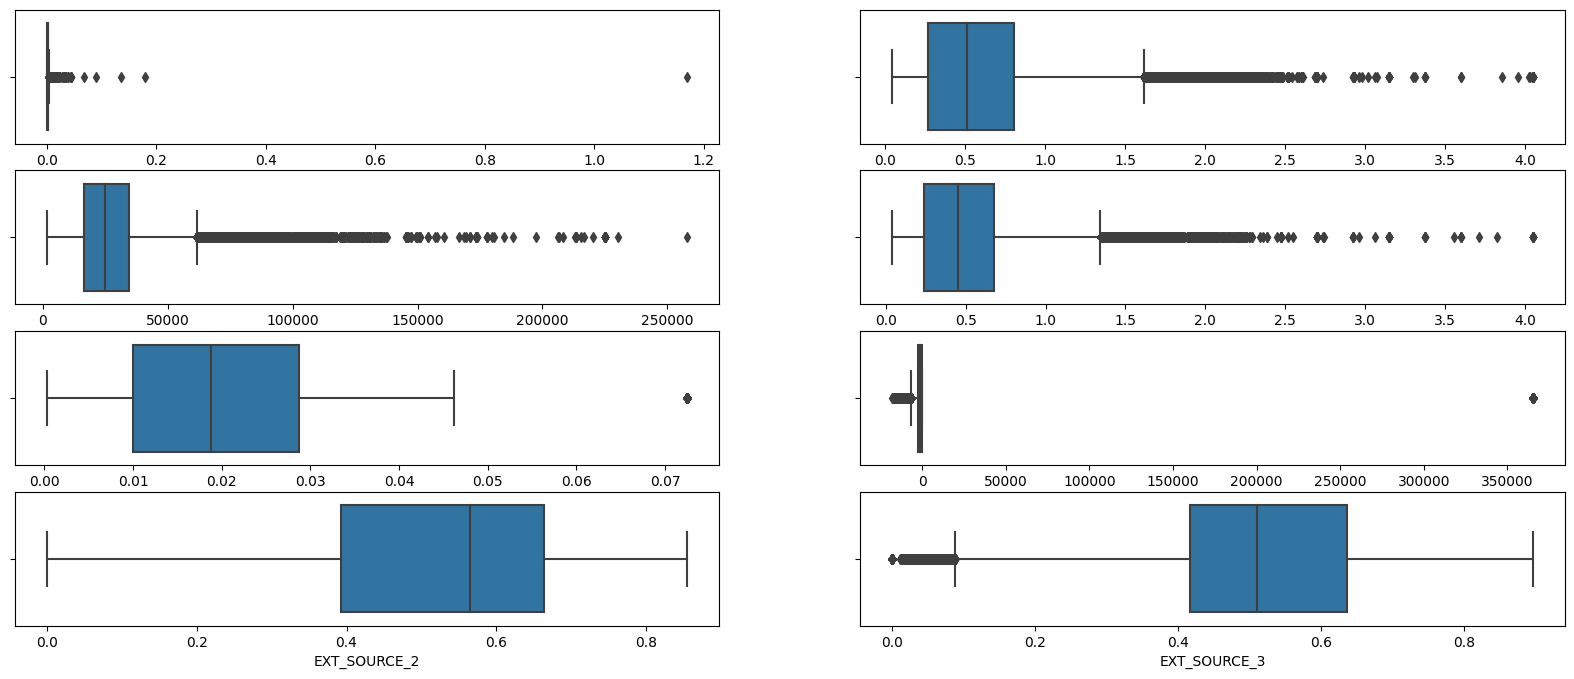

In [ ]:
print("Menentukan outlier pada data")
plt.figure(figsize=(20,8))
plt.subplot(4,2,1)
sns.boxplot(x ="AMT_INCOME_TOTAL",data=dfapptrain)

plt.subplot(4,2,2)
sns.boxplot(x ="AMT_CREDIT",data=dfapptrain)


plt.subplot(4,2,3)
sns.boxplot(x ="AMT_ANNUITY",data=dfapptrain)

plt.subplot(4,2,4)
sns.boxplot(x ="AMT_GOODS_PRICE",data=dfapptrain)
#
plt.subplot(4,2,5)
sns.boxplot(x ="REGION_POPULATION_RELATIVE",data=dfapptrain)

plt.subplot(4,2,6)
sns.boxplot(x ="DAYS_EMPLOYED",data=dfapptrain)

plt.subplot(4,2,7)
sns.boxplot(x ="EXT_SOURCE_2",data=dfapptrain)

plt.subplot(4,2,8)
sns.boxplot(x ="EXT_SOURCE_3",data=dfapptrain)


def get_func(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return lower_bound, upper_bound

def get_outliers(x):
    lower_bound, upper_bound = get_func(x)
    return x[np.where((x < lower_bound ) | (x > upper_bound))]

print( "Outlier pada Ammount Income Total", get_outliers(dfapptrain["AMT_INCOME_TOTAL"].values), "Sebanyak", len(get_outliers(dfapptrain["AMT_INCOME_TOTAL"].values)), "outlier")
print( "Outlier pada Ammount Credit", get_outliers(dfapptrain["AMT_CREDIT"].values), "Sebanyak", len(get_outliers(dfapptrain["AMT_CREDIT"].values)), "outlier")
print( "Outlier pada Ammount Annuity", get_outliers(dfapptrain["AMT_ANNUITY"].values), "Sebanyak", len(get_outliers(dfapptrain["AMT_ANNUITY"].values)), "outlier")
print( "Outlier pada Ammount Goods Price", get_outliers(dfapptrain["AMT_GOODS_PRICE"].values), "Sebanyak", len(get_outliers(dfapptrain["AMT_GOODS_PRICE"].values)), "outlier")
print( "Outlier pada Region Population Relative", get_outliers(dfapptrain["REGION_POPULATION_RELATIVE"].values), "Sebanyak", len(get_outliers(dfapptrain["REGION_POPULATION_RELATIVE"].values)), "outlier")
print( "Outlier pada Days Employed", get_outliers(dfapptrain["DAYS_EMPLOYED"].values), "Sebanyak", len(get_outliers(dfapptrain["DAYS_EMPLOYED"].values)), "outlier")
print( "Outlier pada Ext Source 2", get_outliers(dfapptrain["EXT_SOURCE_2"].values), "Sebanyak", len(get_outliers(dfapptrain["EXT_SOURCE_2"].values)), "outlier")
print( "Outlier pada EXT SOURCE 3", get_outliers(dfapptrain["EXT_SOURCE_3"].values), "Sebanyak", len(get_outliers(dfapptrain["EXT_SOURCE_3"].values)), "outlier")

Dari visualisasi boxplot dapat dengan jelas diketahui outlier dimana hampir semua feautre memiliki outlier. Oleh karena itu diperlukan proses untuk menangani outlier ini agar tidak mengganggu kinerja dari machine learning

Handling Outlier

Setelah melakukan winsorize nilai min dan max data berubah sesuai dengan deskripsi dan outlier dari data pun dapat disesuaikan dengan data outlier tidak dihapus


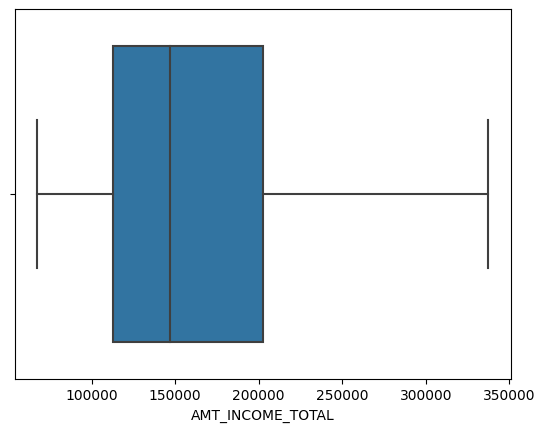

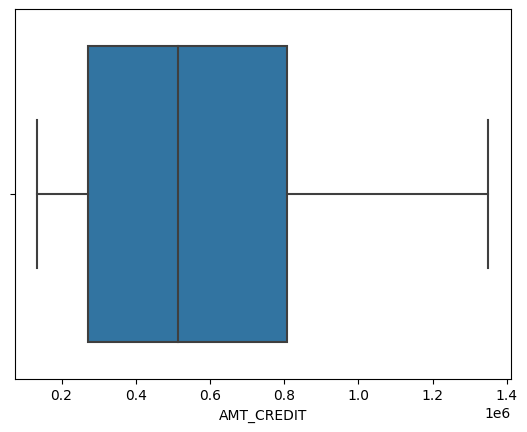

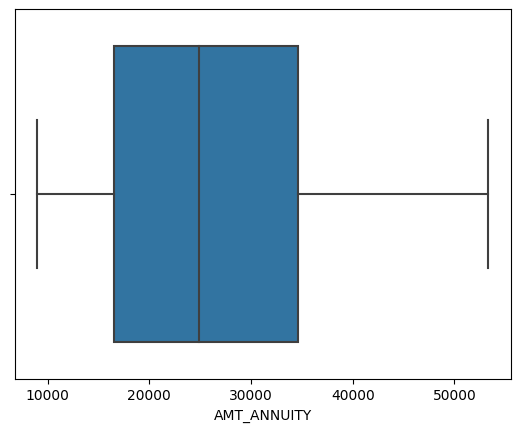

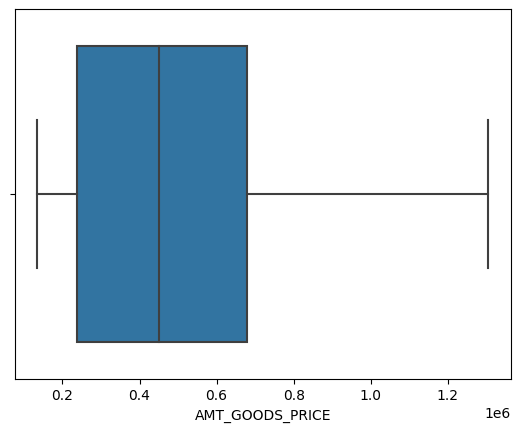

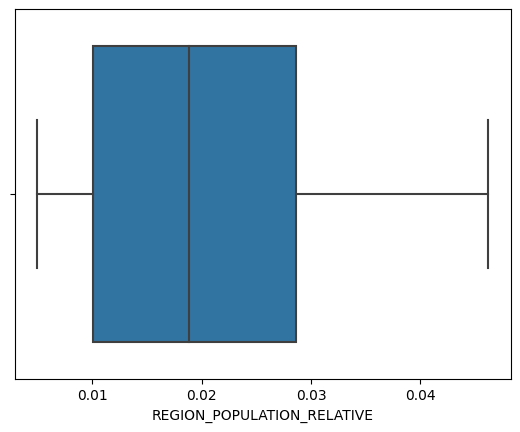

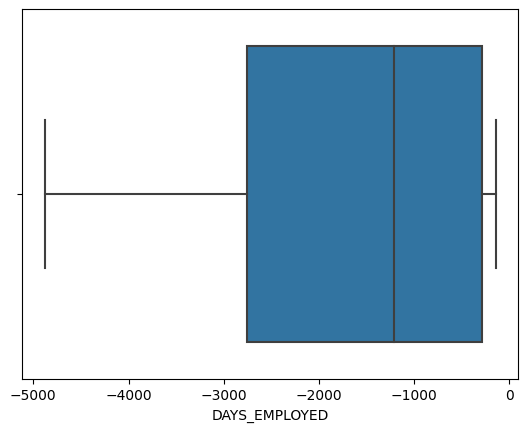

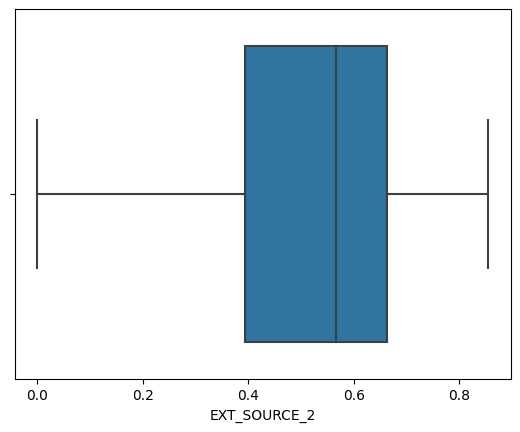

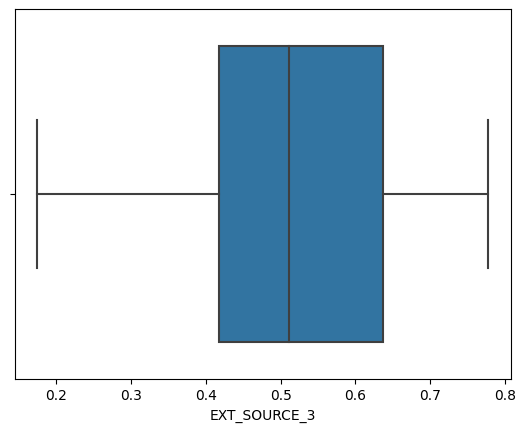

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 60 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [ ]:
dfhandle = dfapptrain.copy()

def capping (df, f) :

    for d in f :
        stats.mstats.winsorize(a=df[d], limits =[0.05, 0.05], inplace=True)
def capping2 (df, f) :
    for d in f :
        stats.mstats.winsorize(a=df[d], limits =[0.1, 0.2], inplace=True)

features = ["AMT_INCOME_TOTAL"]
features2 = ["AMT_CREDIT"]
features3 = ["AMT_ANNUITY"]
features4 = ["AMT_GOODS_PRICE"]
features5 = ["REGION_POPULATION_RELATIVE"]
features6 = ["DAYS_EMPLOYED"]
features7 = ["EXT_SOURCE_3"]

capping(dfhandle, features)
capping(dfhandle, features2)
capping(dfhandle, features3)
capping(dfhandle, features4)
capping(dfhandle, features5)
capping2(dfhandle, features6)
capping(dfhandle, features7)

#print(dfhandle.describe())
print(10*"====")
#print(len(df_use.index))
print("Setelah melakukan winsorize nilai min dan max data berubah sesuai dengan deskripsi dan outlier dari data pun dapat disesuaikan dengan data outlier tidak dihapus")

sns.boxplot(x="AMT_INCOME_TOTAL", data=dfhandle)
plt.show()

sns.boxplot(x="AMT_CREDIT", data=dfhandle)
plt.show()

sns.boxplot(x="AMT_ANNUITY", data=dfhandle)
plt.show()

sns.boxplot(x="AMT_GOODS_PRICE", data=dfhandle)
plt.show()

sns.boxplot(x="REGION_POPULATION_RELATIVE", data=dfhandle)
plt.show()

sns.boxplot(x="DAYS_EMPLOYED", data=dfhandle)
plt.show()

sns.boxplot(x="EXT_SOURCE_2", data=dfhandle)
plt.show()

sns.boxplot(x="EXT_SOURCE_3", data=dfhandle)
plt.show()
dfhandle.info()

Setelah melaukan handling outlier dengan proses winsorizing, beberapa kolom akan diambil menjadi sejumlah window tertentu, dengan memotong data outlier pada bagian atas sebanyak 5% dan 20%, selain itu data juga dipotong pada batas bawah outlier sebanyak 5% dan 10%. Nilai yang lebih dari batas atas akan diganti menggunakan batas atas dan begitu juga untuk nilai yang berada jauh di bawah. Sehingga untuk feature tersebut sudah tidak memiliki outlier

One hot encoding

In [ ]:

encoded_df = pd.get_dummies(dfhandle, columns=dfhandle.select_dtypes(include=['object']).columns)
#encoded_df = pd.get_dummies(dfhandle, columns=['NAME_INCOME_TYPE'])
print(encoded_df.head())

   SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0          202500.0    406597.5   
1      100003       0             0          270000.0   1293502.5   
2      100004       0             0           67500.0    135000.0   
3      100006       0             0          135000.0    312682.5   
4      100007       0             0          121500.0    513000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  \
0      24700.5         351000.0                    0.018801           -637   
1      35698.5        1129500.0                    0.004960          -1188   
2       9000.0         135000.0                    0.010032           -225   
3      29686.5         297000.0                    0.008019          -3039   
4      21865.5         513000.0                    0.028663          -3038   

   FLAG_MOBIL  ...  ORGANIZATION_TYPE_Trade: type 4  \
0           1  ...                                0   
1     

Data kategorical akan dijadi bilangan biner 1 apabila sesuai dan akan bernilai 0 untuk kategori lain.

Rescaled data using min-max scaler

In [ ]:
dftrain = encoded_df.copy().drop(columns="SK_ID_CURR")
features = list(dftrain.columns)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dftrain)
scaler.fit(scaled_data)
scaled_data = scaler.transform(scaled_data)
scaled_data = pd.DataFrame(data=scaled_data, columns=features)
print("Scaled Data:")
print(scaled_data)

Scaled Data:
        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0          1.0           0.0          0.500000    0.223537     0.354213   
1          0.0           0.0          0.750000    0.953500     0.602335   
2          0.0           0.0          0.000000    0.000000     0.000000   
3          0.0           0.0          0.250000    0.146241     0.466701   
4          0.0           0.0          0.200000    0.311111     0.290254   
...        ...           ...               ...         ...          ...   
307506     0.0           0.0          0.333333    0.098519     0.418680   
307507     0.0           0.0          0.016667    0.110741     0.067716   
307508     0.0           0.0          0.316667    0.446637     0.473299   
307509     1.0           0.0          0.383333    0.193504     0.252792   
307510     0.0           0.0          0.333333    0.444444     0.905076   

        AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  \
0              0

Data kemudian akan di rescale, untuk mengatasi perbedaan skala di tiap fiturnya. Sehingga dengan teknik normalisasi min max scalling ini akan menghasilkan nilai berskala dari 0 sampai dengan 1.

**Feature selection**

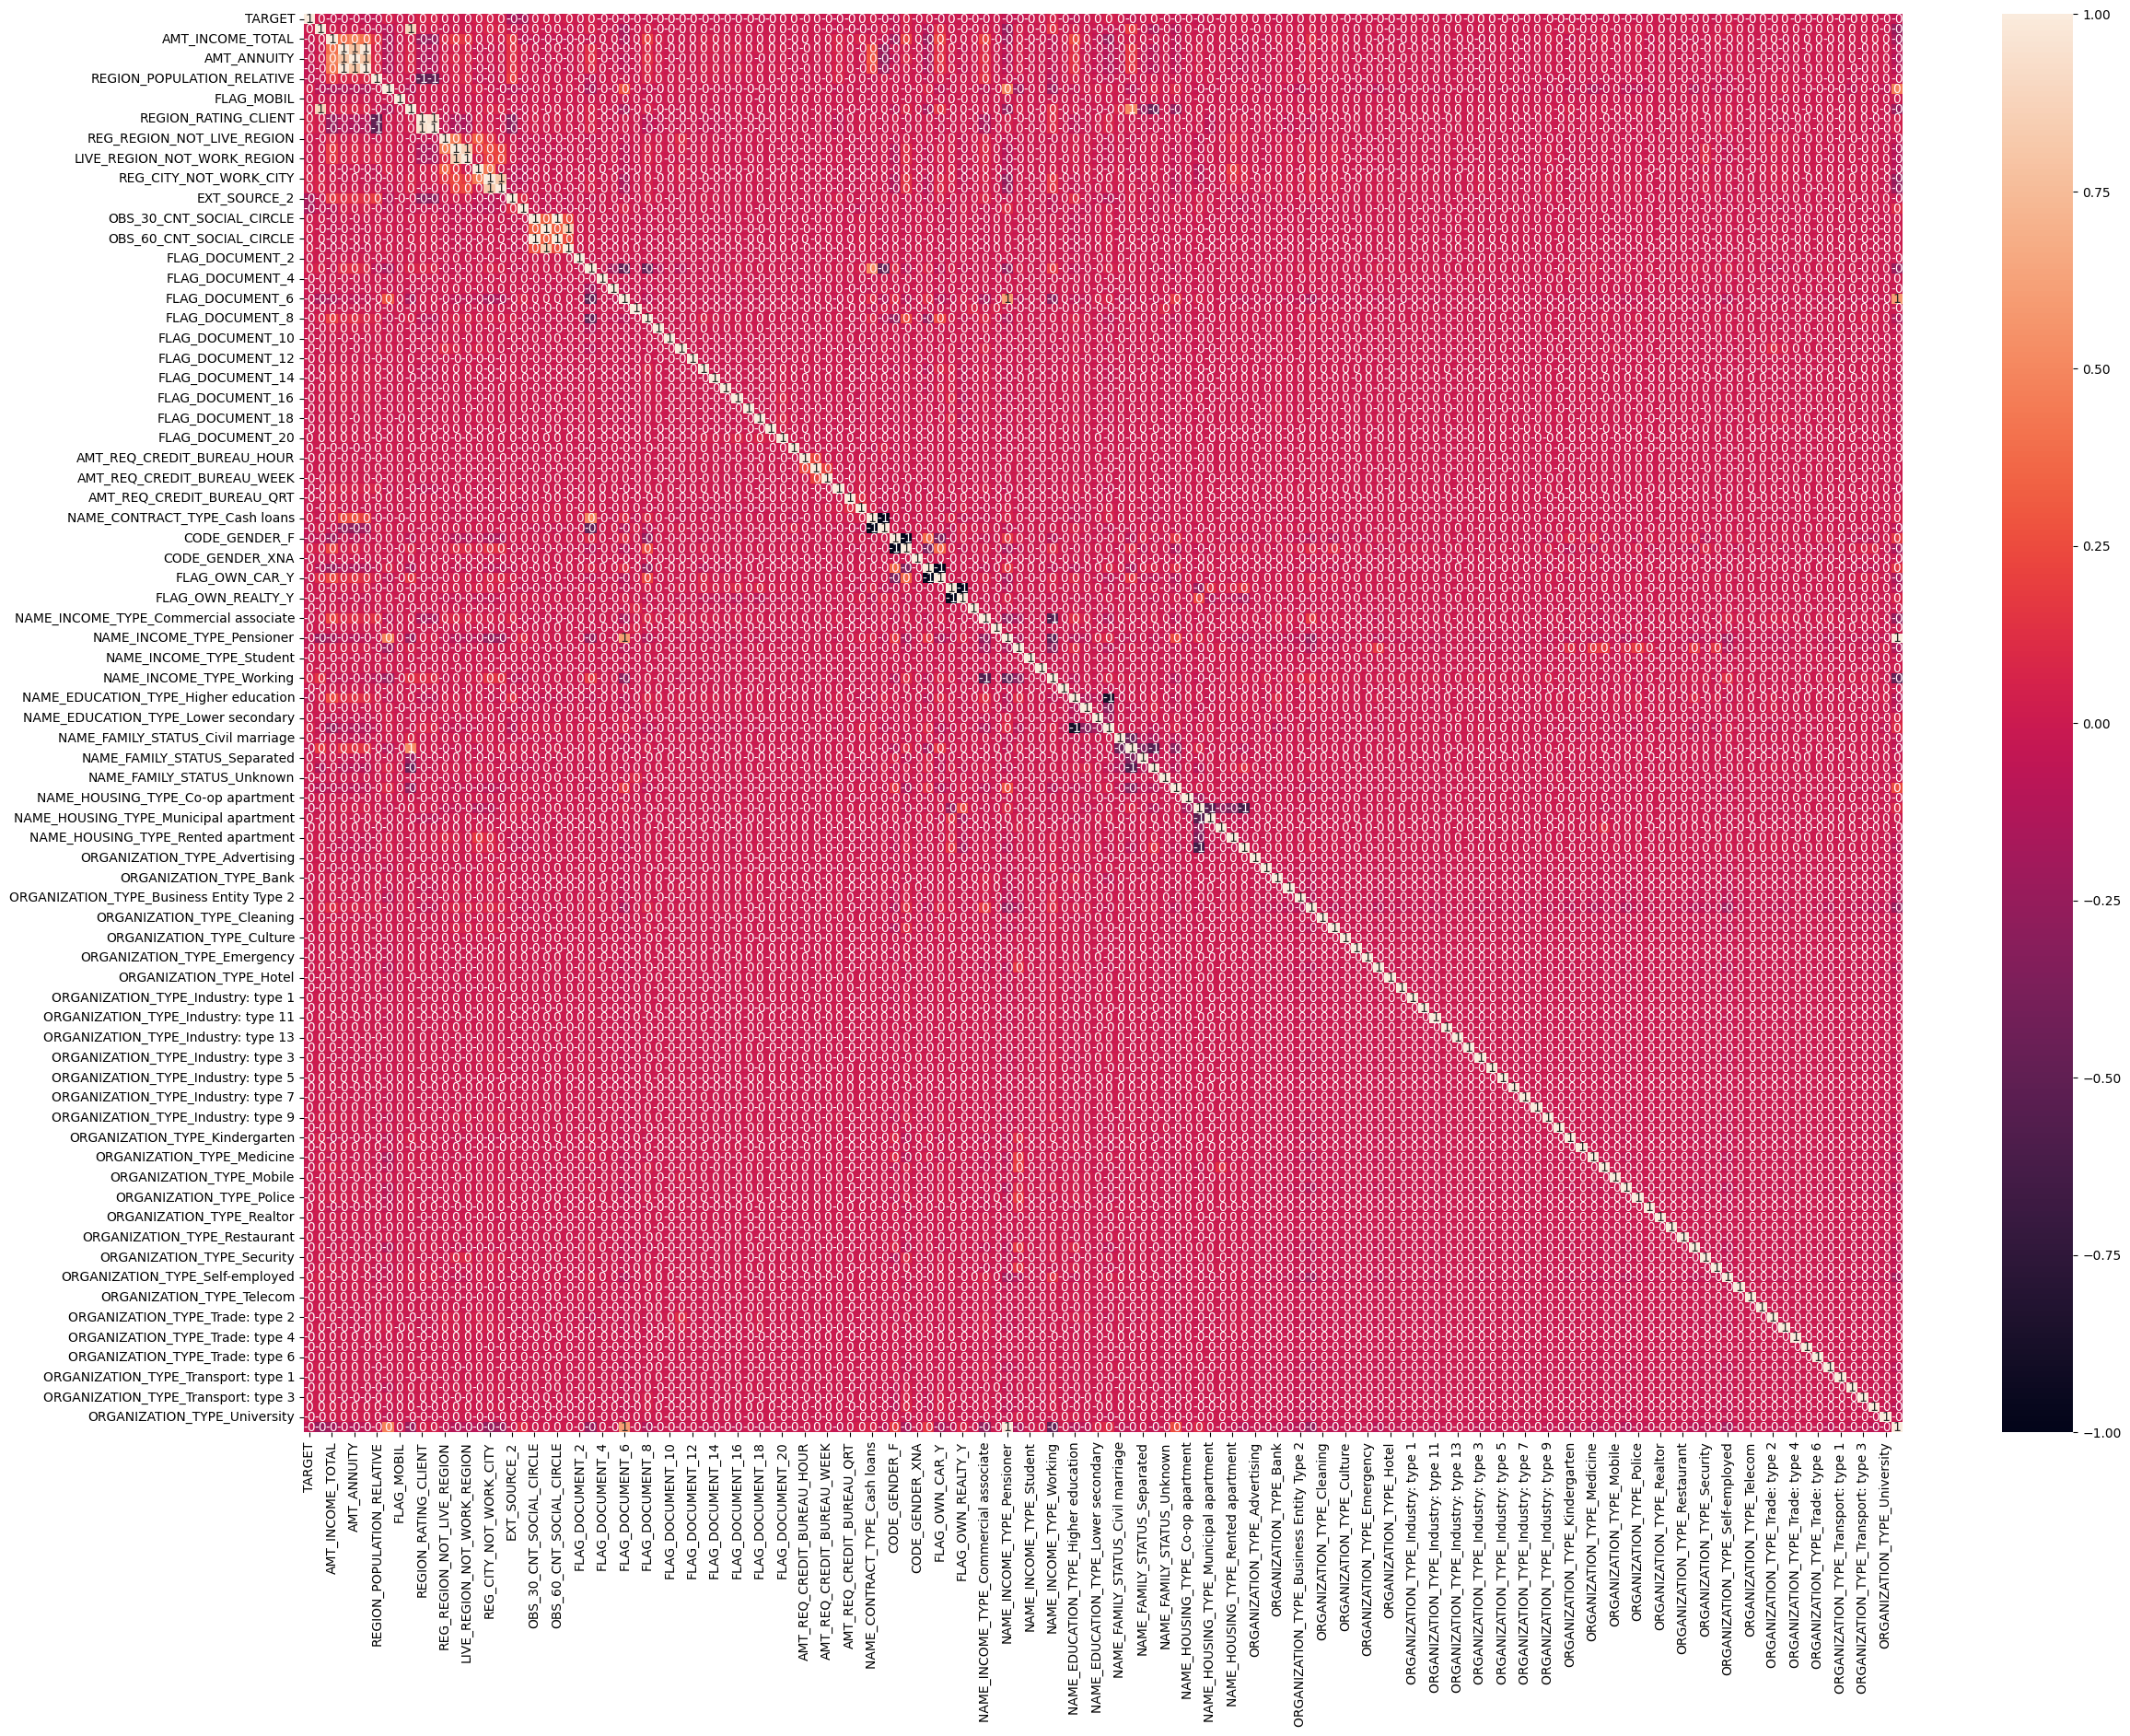

In [ ]:
plt.figure(figsize=(28,20))
sns.heatmap(scaled_data.corr(), annot=True, fmt='.0f')
plt.show()

korelasi heatmap di atas menunjukkan secara visual hubungan antara variabel, hal ini digunakan sebagai seleksi awal fitur-fitur yang akan digunakan, ketika warna semakin gelap maka hubungan dianatara variabel sangat kuat

data split and imbalance correction

In [ ]:
dfx_train =scaled_data.copy()
fory_train = scaled_data.copy()
fory_train["SK_ID_CURR"] = encoded_df["SK_ID_CURR"]
dfy_train = fory_train

print("Jumlah feature X train ", dfx_train.shape[1])
print("Jumlah feature Y train ",dfy_train.shape[1])

train,test = train_test_split(dfy_train,test_size=.25,random_state = 123)

train_X = train[[i for i in train.columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]]
train_Y = train[["TARGET"]]

test_X  = test[[i for i in test.columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]]
test_Y  = test[["TARGET"]]

print(f'Jumlah Data X Train : {train_X.shape[0]}')
print(f'Jumlah Data X Test: {test_X.shape[0]}')

print(f'Jumlah Data Y Train : {train_Y.shape[0]}')
print(f'Jumlah Data Y Test: {test_Y.shape[0]}')


count = train['TARGET'].value_counts()
num_majority = count[0]
num_minority = count[1]
print(num_majority)
print(num_minority)
print("data imbalance")

# imbalance correction using undersampling
num_undersample_majority = 2 * num_minority


df_majority = train[train["TARGET"] == 0]
df_minority = train[train["TARGET"] == 1]

df_majority_undersampled = resample(df_majority, replace=False,
                                   n_samples=num_undersample_majority,
                                   random_state=123)

df_undersampled = pd.concat([df_minority,df_majority_undersampled],axis=0)

#splitting dependent and independent variables

df_undersampled_X = df_undersampled[[i for i in df_undersampled.columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]]
df_undersampled_Y = df_undersampled[["TARGET"]]
print(10*"===")
print(df_undersampled.shape[1])
print(df_undersampled_X.shape[1])

Jumlah feature X train  142
Jumlah feature Y train  143
Jumlah Data X Train : 230633
Jumlah Data X Test: 76878
Jumlah Data Y Train : 230633
Jumlah Data Y Test: 76878
212077
18556
data imbalance
143
141


Data akan dipisahkan menjadi data train dan juga data test, data train akan digunakan dalam menguji model machine learning, dan data test akan mengevaluasi kinerja dari modelnya. Selain itu diketahui bahwa data tersebut imbalance sehingga digunakan method undersampling untuk menyeimbangkan antara kelas mayoritas dan minoritas sehingga prediksi terhadap kelas minoritas dapat dilakukan lebih baik

In [ ]:
train,test = train_test_split(df_undersampled,test_size=.25,random_state = 123)

X_train_over = train[[i for i in train.columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]]
y_train_over = train[["TARGET"]]

X_test  = test[[i for i in test.columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]]
y_test  = test[["TARGET"]]


Data hasil undersampling akan dipisah kembali menjadi data train dan juga data test

In [ ]:
"""smoteenn = SMOTE(random_state=42)
X_train_over, y_train_over = smoteenn.fit_resample(train_X, train_Y)
X_train_over.shape"""
"""
X_reg=dfx_train.iloc[:,1:114]

y_reg=dfx_train.iloc[:,0]

X_reg_new=SelectKBest(score_func=f_regression,k=6).fit_transform(X_reg,y_reg)
print(X_reg_new[:5])
print(X_reg.head())"""

**Algorithm Selection**

In [ ]:
logreg = LogisticRegression()
knneighbor = KNeighborsClassifier()
decisiontree = DecisionTreeClassifier()
randomforest = RandomForestClassifier(random_state=42)
gradientboost = GradientBoostingClassifier()
xgb = XGBClassifier()
MLA = [logreg, knneighbor, decisiontree, randomforest, gradientboost, xgb]

MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:
    start = dt.now()
    predicted = alg.fit(X_train_over, y_train_over).predict(X_test)
    y_pred_proba_test = alg.fit(X_train_over, y_train_over).predict_proba(X_test)
    y_pred_proba_train = alg.fit(X_train_over, y_train_over).predict_proba(X_train_over)
    score = cross_validate(alg, df_undersampled_X, df_undersampled_Y, cv=5, scoring='roc_auc', return_train_score=True)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA used'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy (%)'] = round(alg.score(X_train_over, y_train_over), 3)*100
    MLA_compare.loc[row_index, 'Test Accuracy (%)'] = round(alg.score(X_test, y_test), 3)*100
    MLA_compare.loc[row_index, 'Precission (%)'] = round(precision_score(y_test, predicted),3)*100
    MLA_compare.loc[row_index, 'Recall (%)'] = round(recall_score(y_test, predicted),3)*100
    MLA_compare.loc[row_index, 'F1-Score (%)'] = round((f1_score(y_test, predicted)),3)*100
    MLA_compare.loc[row_index, 'roc-auc (test prob)'] = round((roc_auc_score(y_test, y_pred_proba_test[:, 1])),3)
    MLA_compare.loc[row_index, 'roc-auc (train prob)'] = round((roc_auc_score(y_train_over, y_pred_proba_train[:, 1])),3)
    MLA_compare.loc[row_index, 'roc-auc (crossval train)'] = round(score['train_score'].mean(),3)
    MLA_compare.loc[row_index, 'roc-auc (crossval test)'] = round(score['test_score'].mean(),3)
    MLA_compare.loc[row_index, 'Time used'] = (dt.now()-start).total_seconds()

    row_index+=1

MLA_compare

,MLA used,Train Accuracy (%),Test Accuracy (%),Precission (%),Recall (%),F1-Score (%),roc-auc (test prob),roc-auc (train prob),roc-auc (crossval train),roc-auc (crossval test),Time used
0,LogisticRegression,72.1,72.3,61.1,39.7,48.1,0.739,0.746,0.745,0.742,17.163895
1,KNeighborsClassifier,76.4,65.2,45.0,34.0,38.7,0.614,0.817,0.816,0.614,266.803209
2,DecisionTreeClassifier,100.0,62.7,42.4,44.6,43.5,0.579,1.000,1.000,0.578,11.981485
3,RandomForestClassifier,100.0,71.5,61.4,32.5,42.5,0.724,1.000,1.000,0.729,130.729160
4,GradientBoostingClassifier,72.7,72.3,61.5,38.7,47.5,0.740,0.759,0.758,0.745,195.235577
5,XGBClassifier,80.1,71.1,57.3,41.2,48.0,0.728,0.873,0.867,0.734,353.778132


Pengujian machine learning model menggunakan 6 model seperti tertera pada tabel, hasil model menunjukkan akurasi, recall dan ROC AUC yang berbeda sebagai perbandingan hasil tersebut akan divisualisasikan seperti berikut

Classifier model comparison

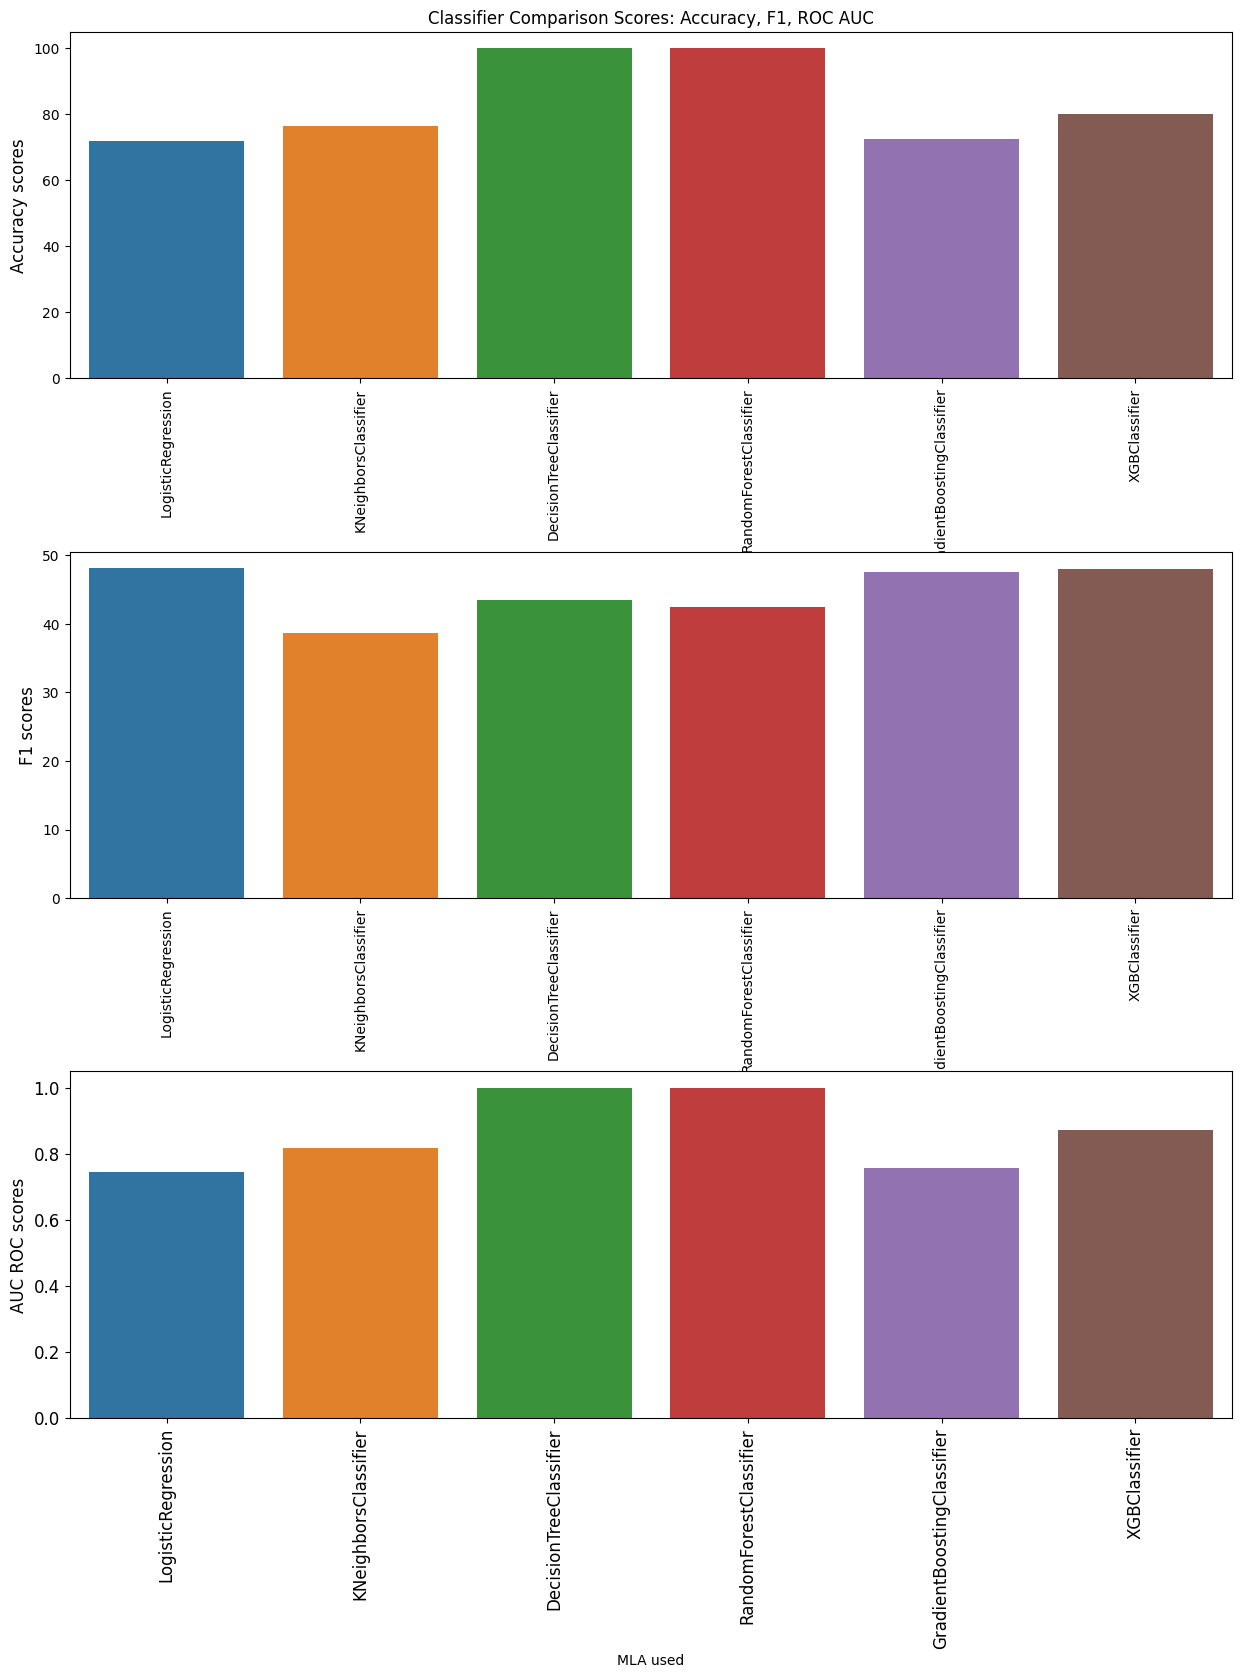

In [ ]:
#logistic regression
plt.figure(figsize=(15,18))
plt.subplot(311)
plt.title('Classifier Comparison Scores: Accuracy, F1, ROC AUC')
s1 = sns.barplot(x = MLA_compare["MLA used"], y=MLA_compare["Train Accuracy (%)"])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
#s1.ylabel('accuracy scores', fontsize=12)
plt.ylabel('Accuracy scores', fontsize=12)
plt.subplot(312)
s2 = sns.barplot(x =MLA_compare["MLA used"] , y=MLA_compare["F1-Score (%)"])
s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
#s2.ylabel('F1 scores', fontsize=12)
plt.ylabel('F1 scores', fontsize=12)
plt.subplot(313)
s3 = sns.barplot(x = MLA_compare["MLA used"], y=MLA_compare["roc-auc (train prob)"])
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
plt.ylabel('AUC ROC scores', fontsize=12)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(hspace = 0.5)
plt.show();

Algorithm Selection
Berdasarkan perbandingan hasil antara accuracy, f1 score, dan juga nilai ROC AUC dapat dilihat bahwa terdapat dua algoritma dengan accuracy 100% dengan perbandingan ROC AUC train dan test yang mirip maka algoritma ini bisa dikatakan overfitting oleh karena itu kedua algoritma tersebut tidak aakn dipilih. Selanjutnya algoritma XGBclassifier memiliki nilai accuracy train paling tinggi dibandingkan beberapa model lain, nilai f1 score serta ROC AUC memiliki perbandingan tidak terlalu jauh. Kesimpulannya XGB classifier akan digunakan sebagai algoritma terpilih.

**Hyperparameter tuning**

In [ ]:
def evaluation_tuned(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train_over)
    y_pred_proba_test = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train_over)

    print('AUC Score Train vs Test:')
    print(f'AUC Score Train proba: {round(roc_auc_score(y_train_over,y_pred_proba_train[:,1]),3)}')
    print(f'AUC Score Test proba: {round(roc_auc_score(y_test,y_pred_proba_test[:,1]),3)}\n')
    print('='*30)

    print('Others Metrics Evaluation:')
    print(f'Train Accuracy Score : {round(accuracy_score(y_train_over,y_pred_train),3)}')
    print(f'Test Accuracy Score : {round(accuracy_score(y_test,y_pred),3)}')
    print(f'Precision Score Test: {round(precision_score(y_test,y_pred),3)}')
    print(f'Recall Score Test : {round(recall_score(y_test,y_pred),3)}')
    print(f'F1 Score Test : {round(f1_score(y_test,y_pred),3)}\n')
    print('='*30)

    print('**CONFUSION MATRIX**')
    conf_matrix =  confusion_matrix(y_test, model.predict(X_test))
    print(conf_matrix)
    print('='*30)

    print(f'Best Parameter: {model.best_params_}')

def evaluation_conf(model) :
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train_over)
    y_pred_proba_test = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train_over)

    """print('AUC Score Train vs Test:')
    print(f'AUC Score Train proba: {round(roc_auc_score(y_train_over,y_pred_proba_train[:,1]),3)}')
    print(f'AUC Score Test proba: {round(roc_auc_score(y_test,y_pred_proba_test[:,1]),3)}\n')
    print('='*30)

    print('Others Metrics Evaluation:')
    print(f'Train Accuracy Score : {round(accuracy_score(y_train_over,y_pred_train),3)}')
    print(f'Test Accuracy Score : {round(accuracy_score(y_test,y_pred),3)}')
    print(f'Precision Score Test: {round(precision_score(y_test,y_pred),3)}')
    print(f'Recall Score Test : {round(recall_score(y_test,y_pred),3)}')
    print(f'F1 Score Test : {round(f1_score(y_test,y_pred),3)}\n')
    print('='*30)
    """
    #print('**CONFUSION MATRIX**')
    conf_matrix =  confusion_matrix(y_test, model.predict(X_test))
    #print(conf_matrix)
    #print('='*30)

    #print(f'Best Parameter: {model.best_params_}')

    return conf_matrix

def evaluation_auc(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train_over)
    y_pred_proba_test = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train_over)

    auc_score = round(accuracy_score(y_test,y_pred),3)

    return auc_score



In [ ]:
pipeline_xgboost = Pipeline([('smt', SMOTE(random_state=42)),
                             ('xgb', XGBClassifier(random_state=42))])

xgb_hyparameters = {'xgb__max_depth' : [int(x) for x in np.linspace(3,30,5)],
                        'xgb__min_child_weight' : [int(x) for x in np.linspace(1,10,11)],
                        'xgb__gamma' : [float(x) for x in np.linspace(0,1,11)],
                        'xgb__tree_method' : ['auto', 'exact', 'approx', 'hist'],
                        'xgb__colsample_bytree' : [float(x) for x in np.linspace(0,1,11)],
}

tuned_xgb = RandomizedSearchCV(pipeline_xgboost, xgb_hyparameters, cv = 5, random_state=42,
                                   n_jobs=-1, scoring='roc_auc')
tuned_xgb.fit(X_train_over,y_train_over)
evaluation_tuned(tuned_xgb)
conf_matrix_result = evaluation_conf(tuned_xgb)

AUC Score Train vs Test:
AUC Score Train proba: 0.763
AUC Score Test proba: 0.739

Others Metrics Evaluation:
Train Accuracy Score : 0.729
Test Accuracy Score : 0.718
Precision Score Test: 0.584
Recall Score Test : 0.449
F1 Score Test : 0.507

**CONFUSION MATRIX**
[[7978 1438]
 [2482 2019]]
Best Parameter: {'xgb__tree_method': 'hist', 'xgb__min_child_weight': 3, 'xgb__max_depth': 3, 'xgb__gamma': 1.0, 'xgb__colsample_bytree': 0.8}
AUC Score Train vs Test:
AUC Score Train proba: 0.763
AUC Score Test proba: 0.739

Others Metrics Evaluation:
Train Accuracy Score : 0.729
Test Accuracy Score : 0.718
Precision Score Test: 0.584
Recall Score Test : 0.449
F1 Score Test : 0.507

**CONFUSION MATRIX**
[[7978 1438]
 [2482 2019]]
Best Parameter: {'xgb__tree_method': 'hist', 'xgb__min_child_weight': 3, 'xgb__max_depth': 3, 'xgb__gamma': 1.0, 'xgb__colsample_bytree': 0.8}


Denagan menggunakan XGB classifier model didapatkan confusion matrik diatas dengan tingkat akurasi 0,71

In [ ]:
conf_matrix_result = evaluation_conf(tuned_xgb)
auc_score = evaluation_auc(tuned_xgb)

TN = conf_matrix_result[0, 0]
FP = conf_matrix_result[0, 1]
FN = conf_matrix_result[1, 0]
TP = conf_matrix_result[1, 1]
#,auc_score
tpr = TP / (TP + FN)
fpr = FP / (FP + TN)

print("Berikut True Positive Ratio dan False Positive Ratio")
print(tpr, fpr)
print("Dengan AUC Score :", auc_score)


Berikut True Positive Ratio dan False Positive Ratio
0.448566985114419 0.15271877655055224
Dengan AUC Score : 0.718


'fig = plt.figure(figsize=(10,8))\nax  = fig.add_subplot(1,2,1)\nax.plot([0,1],[0,1],linewidth=2,linestyle="dashed")\nplt.legend(loc="best")\nplt.title("ROC-CURVE & AREA UNDER CURVE")\nplt.xlabel("False Positive Rate")\nplt.ylabel("True Positive Rate")\n\nax  = fig.add_subplot(1,2,2)\nax.plot(fpr,tpr,label   = ["Area under curve : ",auc_score],linewidth=2,linestyle="dotted")\n'

In [ ]:
# feature importance with shape
xgb = XGBRegressor(n_estimators=100)
xgb.fit(X_train_over, y_train_over)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
xgb.feature_importances_

array([0.00411023, 0.00565878, 0.00869345, 0.01000582, 0.01181421,
       0.00674588, 0.01019335, 0.        , 0.00835925, 0.00731552,
       0.01385729, 0.00768211, 0.00592648, 0.01034166, 0.01124474,
       0.00996402, 0.00961532, 0.02480909, 0.02903897, 0.00691188,
       0.01002073, 0.00711133, 0.01111065, 0.00479735, 0.01452462,
       0.00101907, 0.00699999, 0.00650216, 0.        , 0.00633601,
       0.00836329, 0.        , 0.00738423, 0.        , 0.00561576,
       0.0045711 , 0.00241835, 0.00830739, 0.00166992, 0.00694568,
       0.00405426, 0.        , 0.00378092, 0.00446393, 0.00676073,
       0.00704998, 0.00675644, 0.00870981, 0.00725266, 0.01230256,
       0.        , 0.02331486, 0.        , 0.        , 0.01576646,
       0.        , 0.00731724, 0.        , 0.        , 0.00736322,
       0.00103641, 0.03194087, 0.00583046, 0.        , 0.00433967,
       0.0235167 , 0.00357087, 0.0282094 , 0.00734996, 0.0069995 ,
       0.01552115, 0.00946086, 0.01557634, 0.00673792, 0.00917

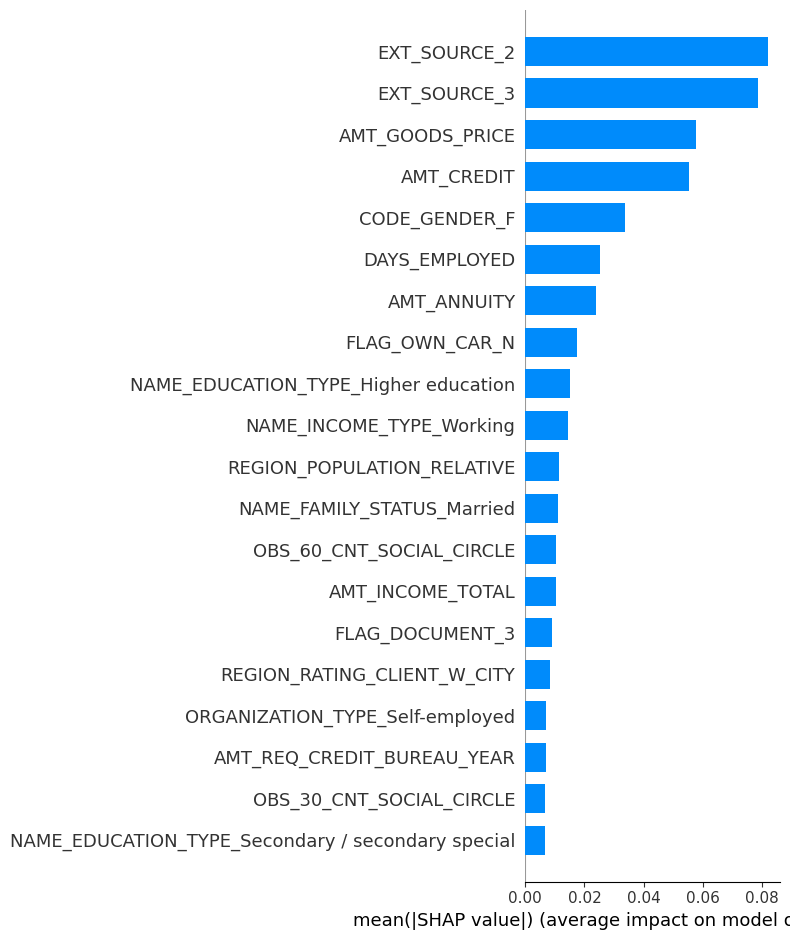

In [ ]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

Dari feature importance menggunakan shap dapat diketahui parameter yang paling berpengaruh, untuk selanjutnya akan digunakan sebagai parameter yang akan digunakan untuk melatih ML model.

In [ ]:
X_train_over.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41751 entries, 82890 to 276553
Data columns (total 141 columns):
 #    Column                                             Non-Null Count  Dtype  
---   ------                                             --------------  -----  
 0    CNT_CHILDREN                                       41751 non-null  float64
 1    AMT_INCOME_TOTAL                                   41751 non-null  float64
 2    AMT_CREDIT                                         41751 non-null  float64
 3    AMT_ANNUITY                                        41751 non-null  float64
 4    AMT_GOODS_PRICE                                    41751 non-null  float64
 5    REGION_POPULATION_RELATIVE                         41751 non-null  float64
 6    DAYS_EMPLOYED                                      41751 non-null  float64
 7    FLAG_MOBIL                                         41751 non-null  float64
 8    CNT_FAM_MEMBERS                                    41751 non-null  fl

**Business Insight and Business Recomendation**

Text(0.5, 0, 'Amount Annuity')

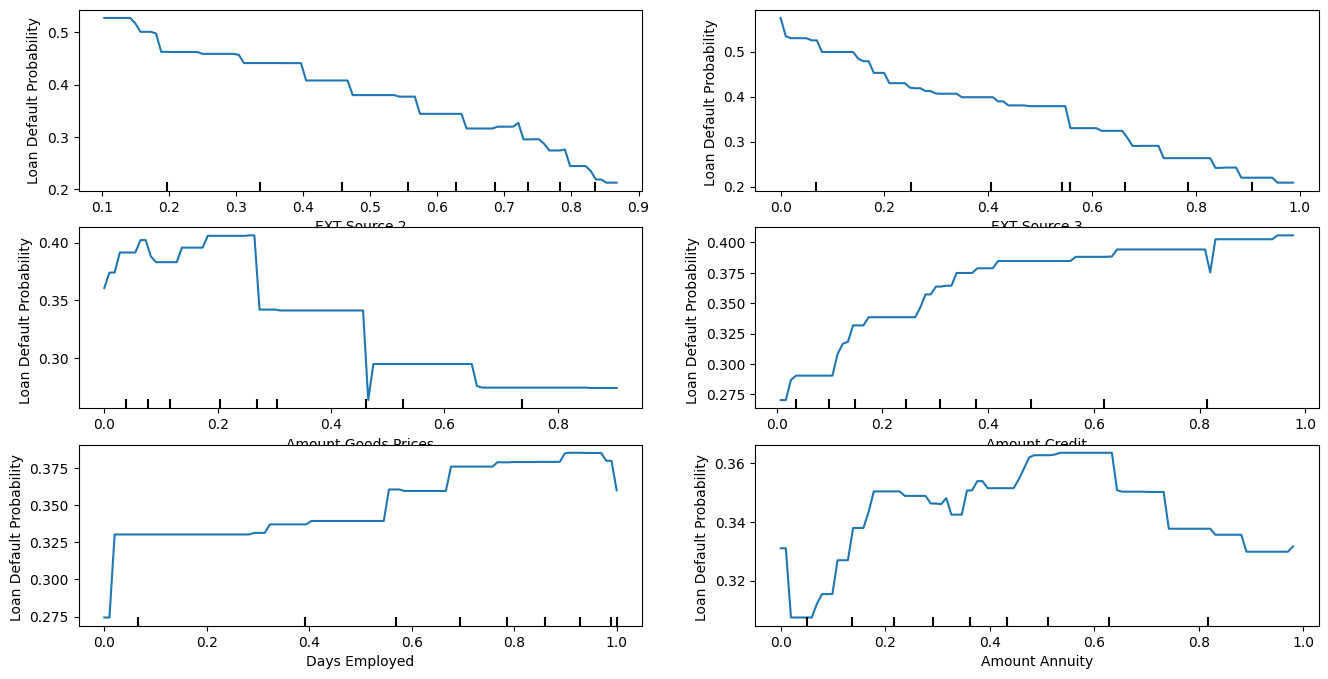

In [ ]:
fig, ax = plt.subplots(3,2, figsize=(16, 8))
pdp1 = PartialDependenceDisplay.from_estimator(tuned_xgb, X_train_over, ["EXT_SOURCE_2"], ax=ax[0,0])
pdp1.axes_[0,0].set_ylabel("Loan Default Probability")
pdp1.axes_[0,0].set_xlabel("EXT Source 2")

pdp2 = PartialDependenceDisplay.from_estimator(tuned_xgb, X_train_over, ["EXT_SOURCE_3"], ax=ax[0,1])
pdp2.axes_[0,0].set_ylabel("Loan Default Probability ")
pdp2.axes_[0,0].set_xlabel("EXT Source 3")

pdp3 = PartialDependenceDisplay.from_estimator(tuned_xgb, X_train_over, ["AMT_GOODS_PRICE"], ax=ax[1,0])
pdp3.axes_[0,0].set_ylabel("Loan Default Probability ")
pdp3.axes_[0,0].set_xlabel("Amount Goods Prices")

pdp4 = PartialDependenceDisplay.from_estimator(tuned_xgb, X_train_over, ["AMT_CREDIT"], ax=ax[1,1])
pdp4.axes_[0,0].set_ylabel("Loan Default Probability ")
pdp4.axes_[0,0].set_xlabel("Amount Credit")

pdp5 = PartialDependenceDisplay.from_estimator(tuned_xgb, X_train_over, ["DAYS_EMPLOYED"], ax=ax[2,0])
pdp5.axes_[0,0].set_ylabel("Loan Default Probability ")
pdp5.axes_[0,0].set_xlabel("Days Employed")

pdp2 = PartialDependenceDisplay.from_estimator(tuned_xgb, X_train_over, ["AMT_ANNUITY"], ax=ax[2,1])
pdp2.axes_[0,0].set_ylabel("Loan Default Probability ")
pdp2.axes_[0,0].set_xlabel("Amount Annuity")

Dari visualisasi partial dependence diatas dapat diketahui informasi sebagai berikut :
External Source 2 dan 3 memberikan prediksi yang akurat, ketika Target dari
borowwer memiliki skor kredit tinggi, maka probabilitas bahwa borowwer gagal bayar sangat rendah. Hal tersebut dapat diketahui dari hubungan korelasi negatif antara external source dengan loan default probability
Borowwer dengan taking loans bertujuan untuk membeli barang dengan harga cenderung tinggi memiliki kemampuan gagal bayar rendah
Jumlah pengambilan pinjaman kredit tinggi memiliki kemungkinan gagal bayar tinggi
Pekerja yang telah bekerja lama cenderung memiliki kemampuan gagal bayar tinggi, dibandingkan dengan yang baru bekerja
Sedangkan jumlah income tahunan tidak memiliki korelasi spesifik terhadap kemampuan gagal bayar

Business recomendation


1.   Perusahaan mempertimbangkan penuh pada skor kredit borowwer sebelum memberikan kredit pinjaman
2.   Borowwer yang telah lama bekerja lebih banyak di setujui pinjamannya, disisi lain ternyata memiliki resiko gagal bayar yang tinggi. Hal tersebut bisa disebabkan oleh berbagai faktor seperti jumlah gaji yang sebenarnya tidak mencukupi
3.   Income borowwer yang tinggi tidak sepenuhnya memiliki kemampuan gagal bayar yang rendah, perusahaan perlu meninjau aspek lain seperti amount credit yang diajukan.  






